# Germantown MWR Zenith Profile 0004 UTC 30 June 2012

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from skewt import SkewT

'''
Germantown MD MWR Profile at 0004 UTC 30 June 2012
'''

tprof = 'mwr_germ_0630_Tprof.txt'
rhprof = 'mwr_germ_0630_RHprof.txt'

T_press = np.loadtxt(tprof, usecols=range(0, 29), skiprows=1, unpack=True)
RH_press = np.loadtxt(rhprof, usecols=range(0, 29), skiprows=1, unpack=True)
T = T_press[2:29,:]
T_K = T.T
RH = RH_press[2:29,:]
RH_pct = RH.T
pressure_mb = T_press[1,:]
press = pressure_mb.tolist()
print("Pressure : ", press, len(press))
height = T_press[0,:]
height_km = height.tolist()
print("Height : ", height_km, len(height_km))
height_m = height * 1000
print(len(height_m))
pressure_pa = pressure_mb
temperature = T_K[:,0]
RH_pct = RH_pct[:,0]
temperature_c = temperature - 273.15
dewpoint_c = 243.04*((np.log(RH_pct/100))+((17.625*temperature_c)/(243.04+temperature_c)))/(17.625-(np.log(RH_pct/100))-((17.625*temperature_c)/(243.04+temperature_c)))
dewpoint = dewpoint_c + 273.15
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH_pct * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH_pct+8.313659)**0.5))) + (np.arctan(temperature_c+RH_pct)) - (np.arctan(RH_pct-1.676331))+((0.00391838*(RH_pct**1.5))*(np.arctan(0.023101*RH_pct))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temperature*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c
T_sfc = temperature[1]
T_top = temperature[19]
thetaw_sfc = thetaw[19]
wetbulb_sfc = wetbulb[1]
wetbulb_top = wetbulb[19]
delta_z = 1400
delta_zkm = 1.4
gamma = (T_sfc - T_top)/(delta_zkm)
gamma_wb = (wetbulb_sfc - wetbulb_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc-thetaw_sfc)/T_sfc) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384
 
mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)

print("Gamma = ", gamma)
print("Wetbulb Gamma = ", gamma_wb)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

('Pressure : ', [998.1, 995.0, 990.0, 984.0, 978.0, 972.0, 965.5, 959.0, 952.5, 946.0, 939.7, 930.0, 920.0, 911.0, 900.0, 889.0, 877.6, 868.0, 859.0, 850.0, 839.5, 829.0, 818.5, 811.0, 804.0, 790.1, 762.8, 732.0, 714.0, 696.0, 667.0, 659.7, 636.0, 612.3, 590.0, 568.2, 561.2, 541.0, 521.0, 501.0, 492.0, 477.0, 460.0, 447.0, 429.0, 414.0, 406.0, 387.0, 374.0, 365.0, 343.0, 333.0, 322.1, 311.5, 301.0, 295.5, 271.0], 57)
('Height : ', [0.0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0], 57)
57
('Sat_mix_ratio = ', array([ 0.05379934,  0.05164888,  0.05127539,  0.04971545,  0.04900609,
        0.04801803,  0.04649731,  0.0452031 ,  0.04420901,  0.04229708,
        0.0397542 ,  0.03847983,  0.03721514,  0.03541399,  0.0339385 ,
        0.031

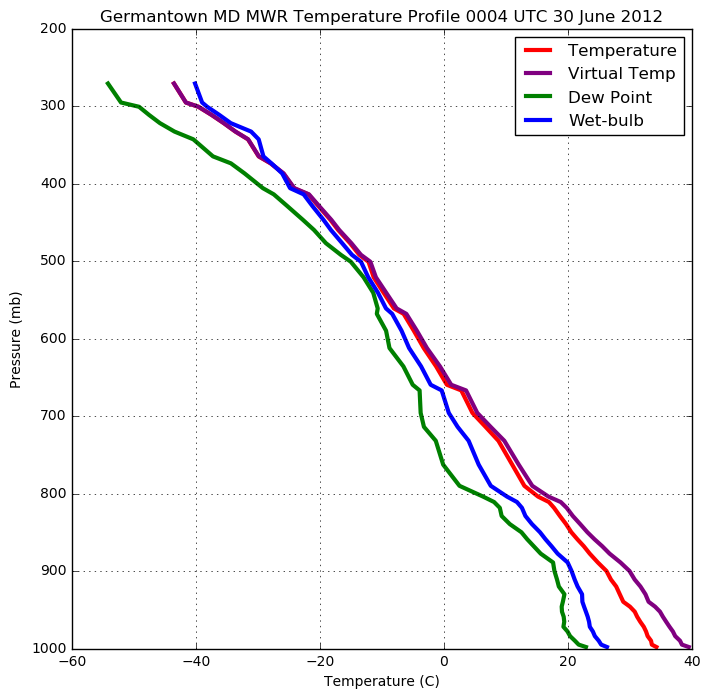

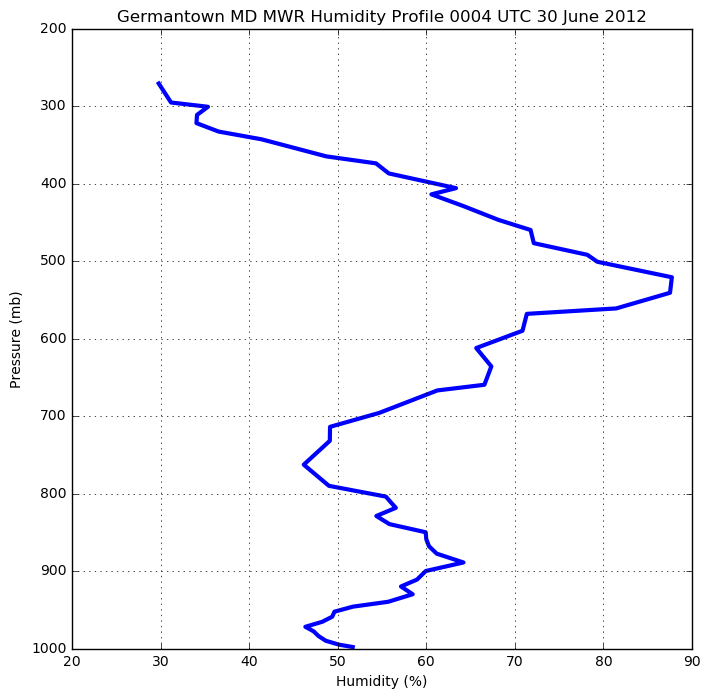

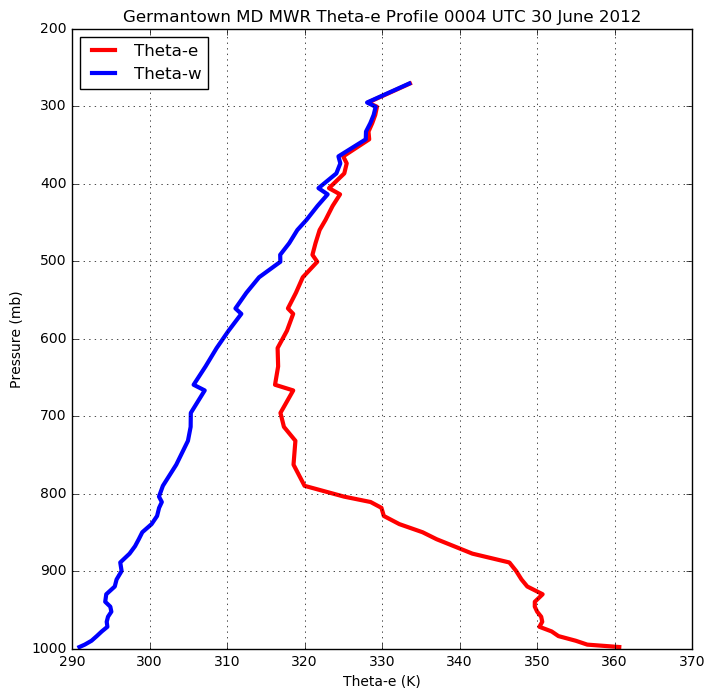

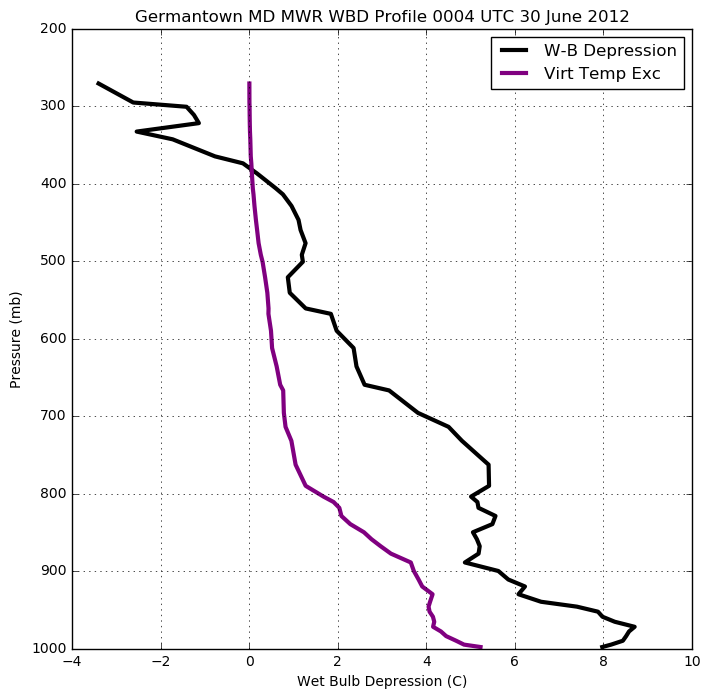

In [9]:
fig = plt.figure(figsize=(8,8))
plt.plot(temperature_c,pressure_pa,color='red',linewidth=3,label='Temperature')
plt.plot(tempvirt_c,pressure_pa,color='purple',linewidth=3,label='Virtual Temp')
plt.plot(dewpoint_c,pressure_pa,color='green',linewidth=3,label='Dew Point')
plt.plot(wetbulb,pressure_pa,color='blue',linewidth=3,label='Wet-bulb')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Temperature (C)")
plt.title("Germantown MD MWR Temperature Profile 0004 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("mwr_germ_temp_press_0004.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(RH_pct,pressure_pa,color='blue',linewidth=3)
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Humidity (%)")
plt.title("Germantown MD MWR Humidity Profile 0004 UTC 30 June 2012")
plt.grid(True)
plt.savefig("mwr_germ_humidity_press_0004.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(thetae,pressure_pa,color='red',linewidth=3,label='Theta-e')
plt.plot(thetaw,pressure_pa,color='blue',linewidth=3,label='Theta-w')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Theta-e (K)")
plt.title("Germantown MD MWR Theta-e Profile 0004 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig("mwr_germ_thtae_press_0004.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(WBD,pressure_pa,color='black',linewidth=3,label='W-B Depression')
plt.plot(tempvirt_exc,pressure_pa,color='purple',linewidth=3,label='Virt Temp Exc')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Wet Bulb Depression (C)")
plt.title("Germantown MD MWR WBD Profile 0004 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("mwr_germ_wbd_press_0004.png",dpi=250,bbox_inches='tight')
plt.show()


---- Lifted Parcel Quantities ----
Parcel: MU
Ps  : 998.1hPa
TCs :  34.3C
TDs :  22.9C
-------------
Plcl: 848.0hPa
Tlcl:  20.3C
Plfc: 846.0hPa
P_el: 202.7hPa
CAPE:4139.4J
CIN:  -15.7J
(998.10000000000002, 34.257000000000005, 22.898397073788963, 'mu')
('CAPE = ', 4139.4154037434573)
Figure saved


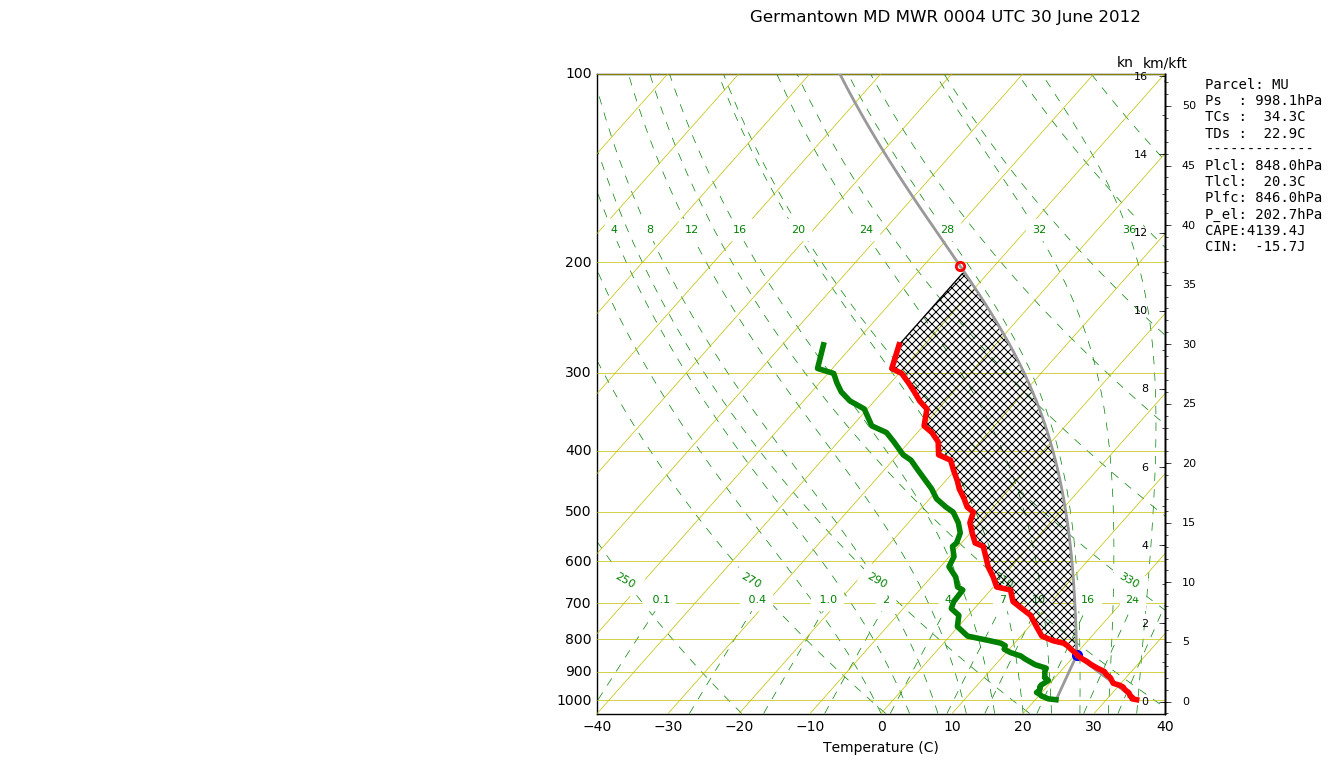

('Z_UP = ', 1.5)
('P_UP = ', 850.0)
('T_UP = ', 293.68700000000001)
('TD_UP = ', 285.6374090677964)
('Z_LO = ', 0.1)
('P_LO = ', 995.0)
('T_LO = ', 306.67399999999998)
('TD_LO = ', 294.86882770643882)
('DD_UP = ', 8.0495909322036141)
('DD_LO = ', 11.805172293561156)
('DDD = ', 3.7555813613575424)
('Gamma = ', 9.2764285714285482)
('MWPI_IRv1 = ', 54.426163970220664)
('WGP_IR = ', 53.549232455641466)
('MWPI_IRv2 = ', 6.7458173903006742)
('WGP_IRv2 = ', 58.685396567768692)
('T_UP_mid = ', array([ 20.537]))
('T_LO_mid = ', array([ 33.524]))
('TD_LO_mid = ', array([ 294.86882771]))
('Tdiff = ', array([ 12.987]))
('DD_LO = ', array([-261.34482771]))
('ST = ', 3)
('MT = ', 1)
('HI = ', 4)
('Tdiff = ', 12.986999999999966)
('DD_LO = ', 11.805172293561156)
('ST = ', 1)
('MT = ', 1)
('HI = ', 2)
('Tdiff = ', array([ 12.987]))
('DD_LO = ', array([-261.34482771]))
('ST = ', 3)
('MT = ', 1)
('HI = ', 4)
('Haines Index MID = ', 4)
('Haines Index HIGH = ', 2)
('C-Haines Index = ', 4)

---- Lifted Parc

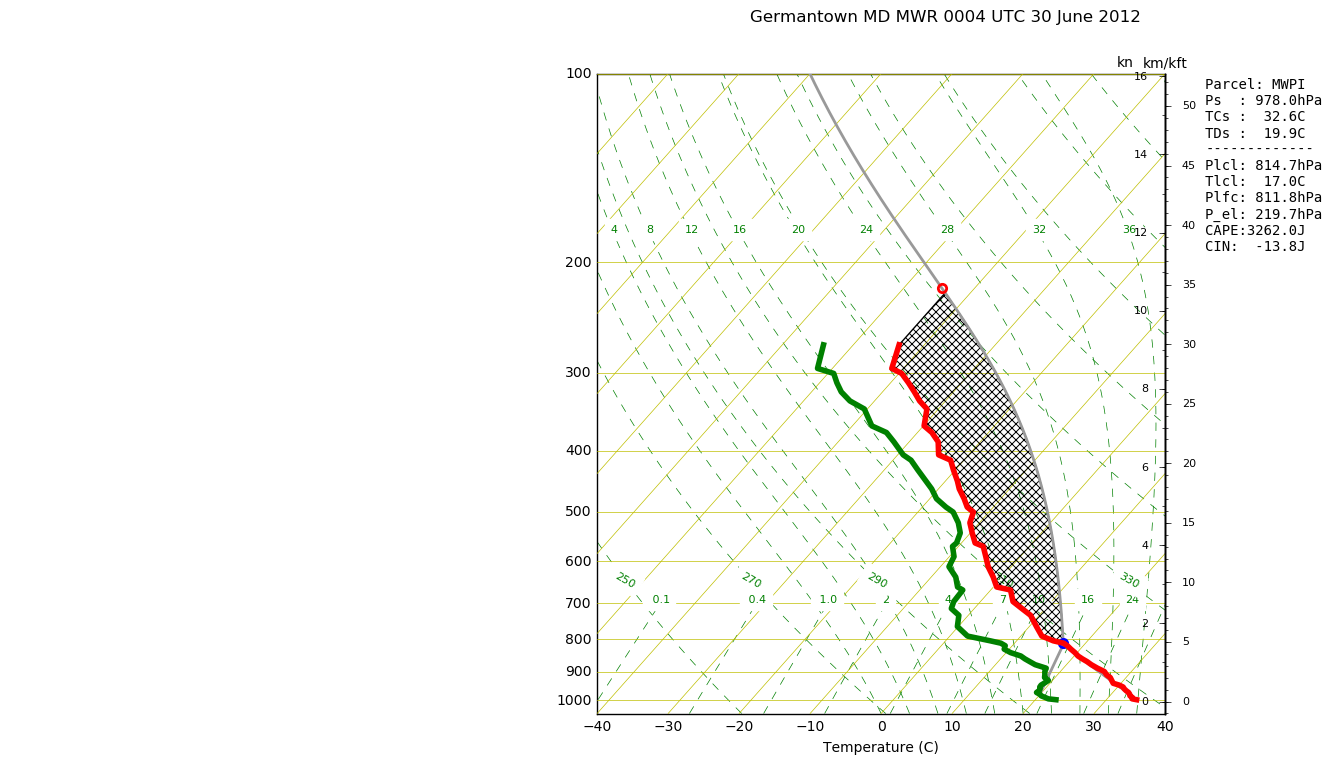


---- Lifted Parcel Quantities ----
Parcel: MU
Ps  : 998.1hPa
TCs :  34.3C
TDs :  22.9C
-------------
Plcl: 848.0hPa
Tlcl:  20.3C
Plfc: 846.0hPa
P_el: 202.7hPa
CAPE:4139.4J
CIN:  -15.7J
Figure saved


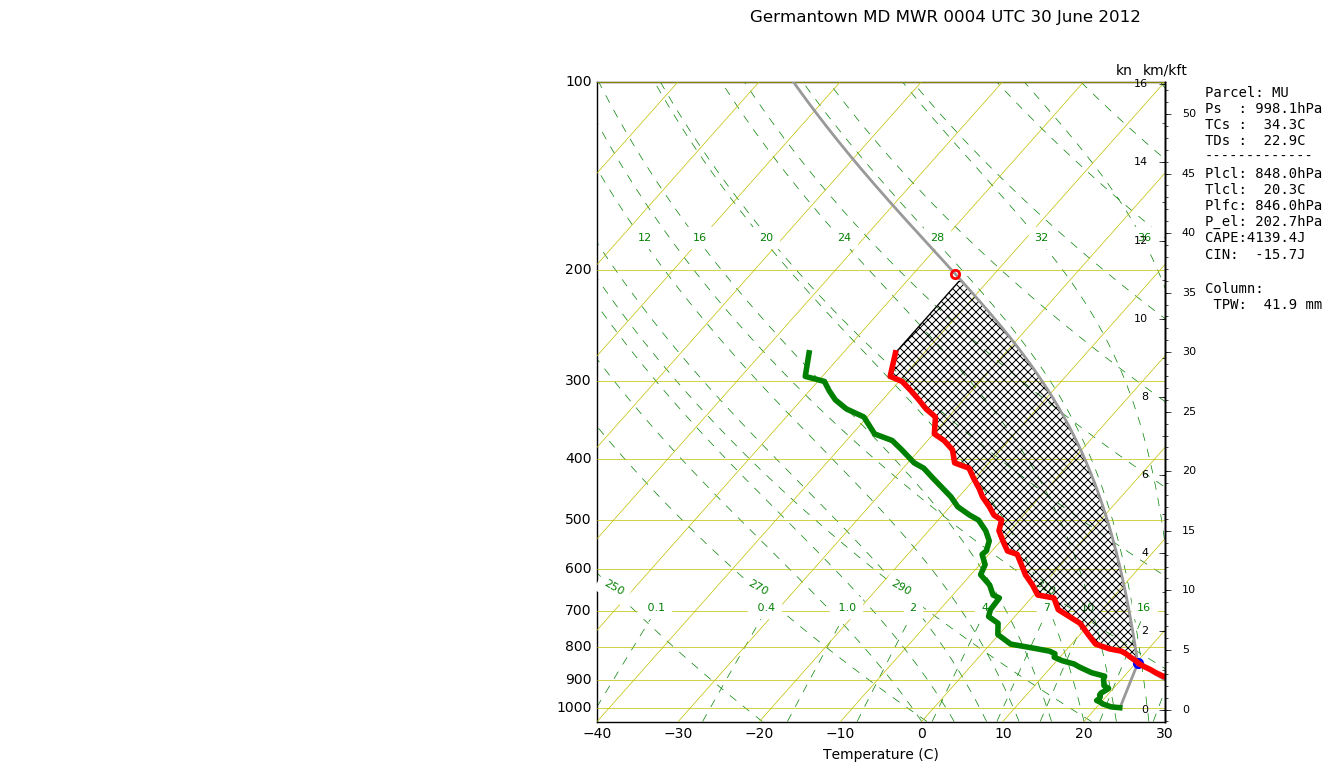

In [10]:
S=SkewT.Sounding(soundingdata=mydata)
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
parcel=S.get_parcel(method='mu')
S.lift_parcel(*parcel)
print(parcel)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('Germantown MD MWR 0004 UTC 30 June 2012')
plt.suptitle('Germantown MD MWR 0004 UTC 30 June 2012',size=12)
plt.savefig("skewt_germ_mwr_0630_0004_mu.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

#Compute the Microburst Windspeed Potential Index (MWPI)
#CAPE = 1033
Z_UP = 1.5
print("Z_UP = ", Z_UP)
P_UP = pressure_pa[19]
print("P_UP = ", P_UP)
T_UP = temperature[19]
print("T_UP = ", T_UP)
TD_UP = dewpoint[19]
print("TD_UP = ", TD_UP)
Z_LO = 0.1
print("Z_LO = ", Z_LO)
P_LO = pressure_pa[1]
print("P_LO = ", P_LO)
T_LO = temperature[1]
print("T_LO = ", T_LO)
TD_LO = dewpoint[1]
print("TD_LO = ", TD_LO)

def MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE):
    gamma = (T_LO - T_UP)/(Z_UP - Z_LO)
    DD_UP = T_UP - TD_UP
    print("DD_UP = ", DD_UP)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    DDD = DD_LO - DD_UP
    if DDD < 0:
        DDD = 0
    print("DDD = ", DDD)
    MWPI_IRv1 = (CAPE/100) + gamma + DDD
    MWPI_IRv2 = (CAPE/1000) + (gamma/5) + (DDD/5)
    WGP_IR = (0.4553 * MWPI_IRv1) + 28.769
    WGP_IRv2 = (0.35435365777*(MWPI_IRv2**2)) + (1.29598552473*MWPI_IRv2) + 33.8176788073
    return gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2
    
gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2 = MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE)

print("Gamma = ", gamma)
print("MWPI_IRv1 = ", MWPI_IRv1)
print("WGP_IR = ", WGP_IR)
print("MWPI_IRv2 = ", MWPI_IRv2)
print("WGP_IRv2 = ", WGP_IRv2)

def Haines_H(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 17:
        ST = 1
    elif Tdiff >= 17 and Tdiff <= 21:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 14:
        MT = 1
    elif DD_LO >= 14 and DD_LO <= 20:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
 
def Haines_M(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 5:
        ST = 1
    elif Tdiff >= 5 and Tdiff <= 10:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 5:
        MT = 1
    elif DD_LO >= 5 and DD_LO <= 12:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
        
def C_Haines(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if DD_LO >30:
        DD_LO=30
    CA=((T_LO-T_UP)/2)-2
    CB=((DD_LO)/3)-1
    if CB>5:
        CB=5+(CB-5)/2
    CH=CA+CB
    return CH
         
idx_pup_mid = np.where(pressure_pa == 850)
idx_plo_mid = np.where(pressure_pa == 995)
T_UP_mid = temperature_c[idx_pup_mid]
print("T_UP_mid = ", T_UP_mid)
T_LO_mid = temperature_c[idx_plo_mid]
print("T_LO_mid = ", T_LO_mid)
TD_LO_mid = dewpoint[idx_plo_mid]
print("TD_LO_mid = ", TD_LO_mid)
    
HI_M = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
HI_H = Haines_H(T_UP, T_LO, TD_LO)
CH = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
    
print("Haines Index MID = ", HI_M)
print("Haines Index HIGH = ", HI_H)
print("C-Haines Index = ", CH)

temp_p2 = temperature_c[4]
dewpt_p2 = dewpoint_c[4]

fig = plt.figure(figsize=(8, 8))
parcel_2=(978.0, temp_p2, dewpt_p2, 'mwpi')
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
S.lift_parcel(*parcel_2)
print(parcel_2)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('Germantown MD MWR 0004 UTC 30 June 2012')
plt.suptitle('Germantown MD MWR 0004 UTC 30 June 2012',size=12)
plt.savefig("skewt_mwpi_germ_mwr_0630_0004.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

fig = plt.figure(figsize=(8, 8))
S.plot_skewt()
fig.suptitle('Germantown MD MWR 0004 UTC 30 June 2012')
plt.suptitle('Germantown MD MWR 0004 UTC 30 June 2012',size=12,horizontalalignment='center',verticalalignment='center')
plt.savefig("skewt_germ_mwr_0630_0004.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

# Germantown MWR Zenith Profile 0108 UTC 30 June 2012

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from skewt import SkewT

'''
Germantown MD MWR Profile at 0108 UTC 30 June 2012
'''

tprof = 'mwr_germ_0630_Tprof.txt'
rhprof = 'mwr_germ_0630_RHprof.txt'

T_press = np.loadtxt(tprof, usecols=range(0, 29), skiprows=1, unpack=True)
RH_press = np.loadtxt(rhprof, usecols=range(0, 29), skiprows=1, unpack=True)
T = T_press[2:29,:]
T_K = T.T
RH = RH_press[2:29,:]
RH_pct = RH.T
pressure_mb = T_press[1,:]
press = pressure_mb.tolist()
print("Pressure : ", press, len(press))
height = T_press[0,:]
height_km = height.tolist()
print("Height : ", height_km, len(height_km))
height_m = height * 1000
print(len(height_m))
pressure_pa = pressure_mb
temperature = T_K[:,4]
RH_pct = RH_pct[:,4]
temperature_c = temperature - 273.15
dewpoint_c = 243.04*((np.log(RH_pct/100))+((17.625*temperature_c)/(243.04+temperature_c)))/(17.625-(np.log(RH_pct/100))-((17.625*temperature_c)/(243.04+temperature_c)))
dewpoint = dewpoint_c + 273.15
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH_pct * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH_pct+8.313659)**0.5))) + (np.arctan(temperature_c+RH_pct)) - (np.arctan(RH_pct-1.676331))+((0.00391838*(RH_pct**1.5))*(np.arctan(0.023101*RH_pct))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temperature*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c
T_sfc = temperature[1]
T_top = temperature[19]
thetaw_sfc = thetaw[19]
wetbulb_sfc = wetbulb[1]
wetbulb_top = wetbulb[19]
delta_z = 1400
delta_zkm = 1.4
gamma = (T_sfc - T_top)/(delta_zkm)
gamma_wb = (wetbulb_sfc - wetbulb_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc-thetaw_sfc)/T_sfc) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384
 
mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)

print("Gamma = ", gamma)
print("Wetbulb Gamma = ", gamma_wb)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

('Pressure : ', [998.1, 995.0, 990.0, 984.0, 978.0, 972.0, 965.5, 959.0, 952.5, 946.0, 939.7, 930.0, 920.0, 911.0, 900.0, 889.0, 877.6, 868.0, 859.0, 850.0, 839.5, 829.0, 818.5, 811.0, 804.0, 790.1, 762.8, 732.0, 714.0, 696.0, 667.0, 659.7, 636.0, 612.3, 590.0, 568.2, 561.2, 541.0, 521.0, 501.0, 492.0, 477.0, 460.0, 447.0, 429.0, 414.0, 406.0, 387.0, 374.0, 365.0, 343.0, 333.0, 322.1, 311.5, 301.0, 295.5, 271.0], 57)
('Height : ', [0.0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0], 57)
57
('Sat_mix_ratio = ', array([ 0.05126393,  0.05172098,  0.05210891,  0.05153659,  0.05143312,
        0.05088716,  0.04993614,  0.04879172,  0.04764863,  0.04607281,
        0.04358839,  0.04119283,  0.03958234,  0.0372108 ,  0.03501941,
        0.032

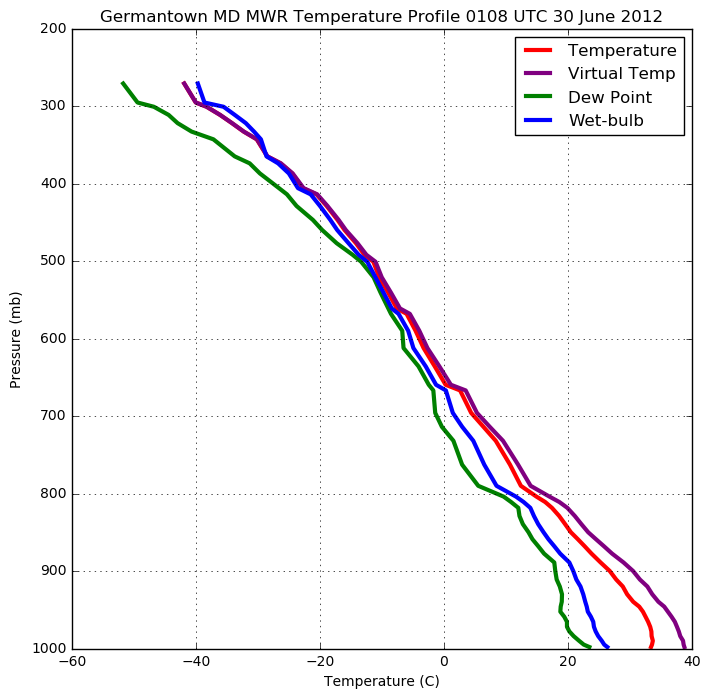

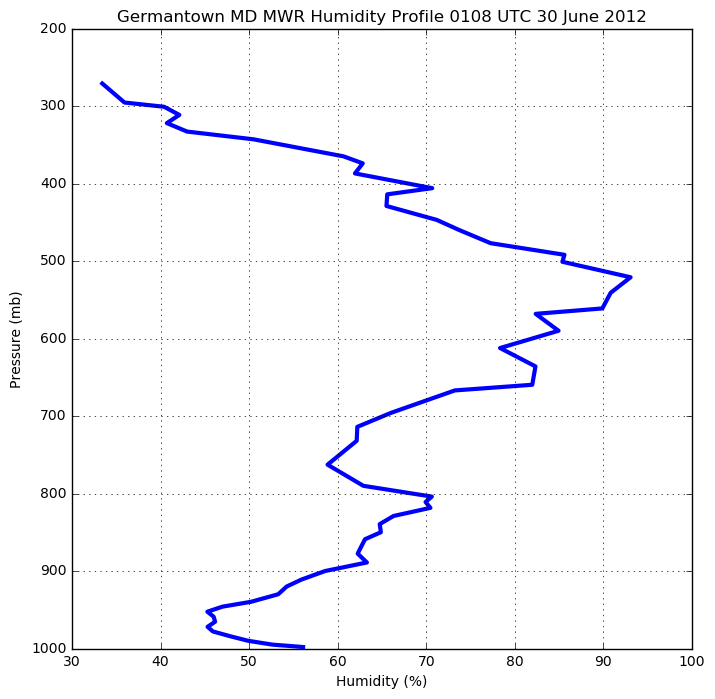

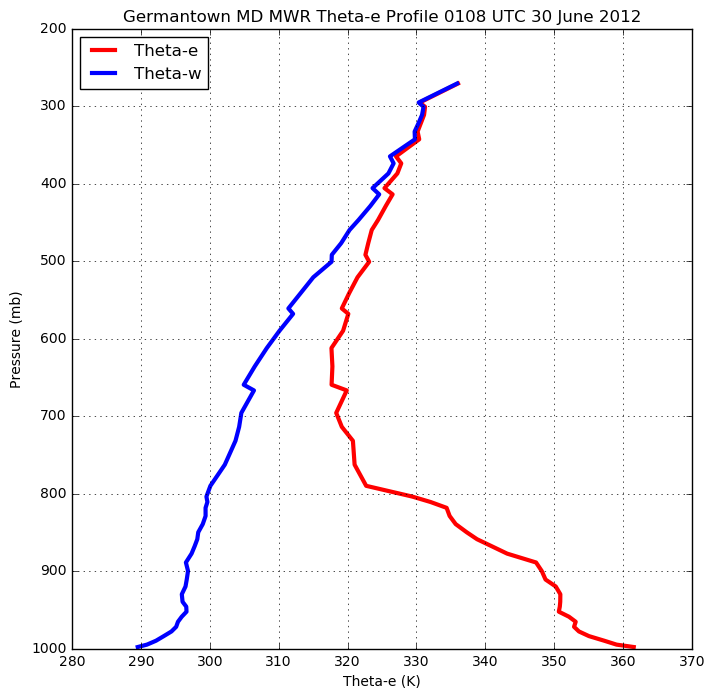

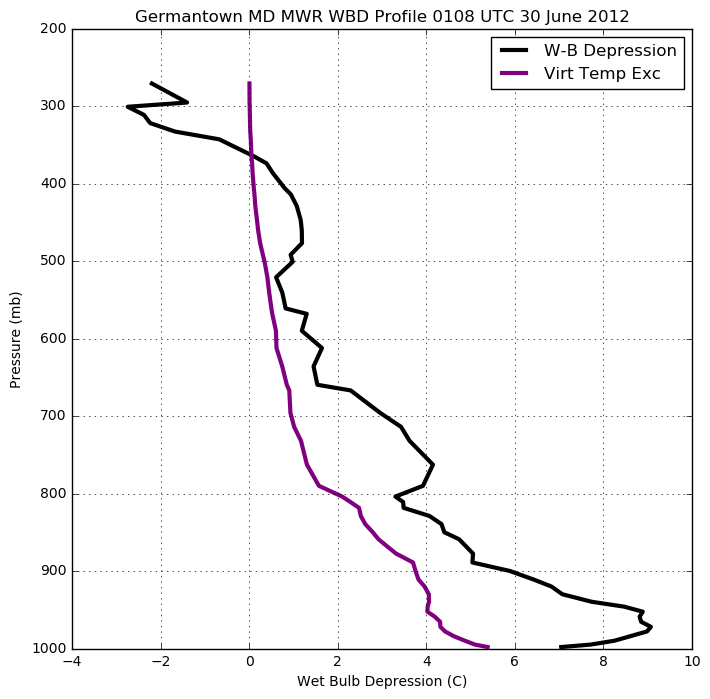

In [12]:
fig = plt.figure(figsize=(8,8))
plt.plot(temperature_c,pressure_pa,color='red',linewidth=3,label='Temperature')
plt.plot(tempvirt_c,pressure_pa,color='purple',linewidth=3,label='Virtual Temp')
plt.plot(dewpoint_c,pressure_pa,color='green',linewidth=3,label='Dew Point')
plt.plot(wetbulb,pressure_pa,color='blue',linewidth=3,label='Wet-bulb')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Temperature (C)")
plt.title("Germantown MD MWR Temperature Profile 0108 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("mwr_germ_temp_press_0108.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(RH_pct,pressure_pa,color='blue',linewidth=3)
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Humidity (%)")
plt.title("Germantown MD MWR Humidity Profile 0108 UTC 30 June 2012")
plt.grid(True)
plt.savefig("mwr_germ_humidity_press_0108.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(thetae,pressure_pa,color='red',linewidth=3,label='Theta-e')
plt.plot(thetaw,pressure_pa,color='blue',linewidth=3,label='Theta-w')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Theta-e (K)")
plt.title("Germantown MD MWR Theta-e Profile 0108 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig("mwr_germ_thtae_press_0108.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(WBD,pressure_pa,color='black',linewidth=3,label='W-B Depression')
plt.plot(tempvirt_exc,pressure_pa,color='purple',linewidth=3,label='Virt Temp Exc')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Wet Bulb Depression (C)")
plt.title("Germantown MD MWR WBD Profile 0108 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("mwr_germ_wbd_press_0108.png",dpi=250,bbox_inches='tight')
plt.show()


---- Lifted Parcel Quantities ----
Parcel: MU
Ps  : 998.1hPa
TCs :  33.4C
TDs :  23.4C
-------------
Plcl: 865.3hPa
Tlcl:  21.1C
Plfc: 846.2hPa
P_el: 206.7hPa
CAPE:4008.2J
CIN:  -82.5J
(998.10000000000002, 33.390000000000043, 23.446755624948125, 'mu')
('CAPE = ', 4008.1516304641855)
Figure saved


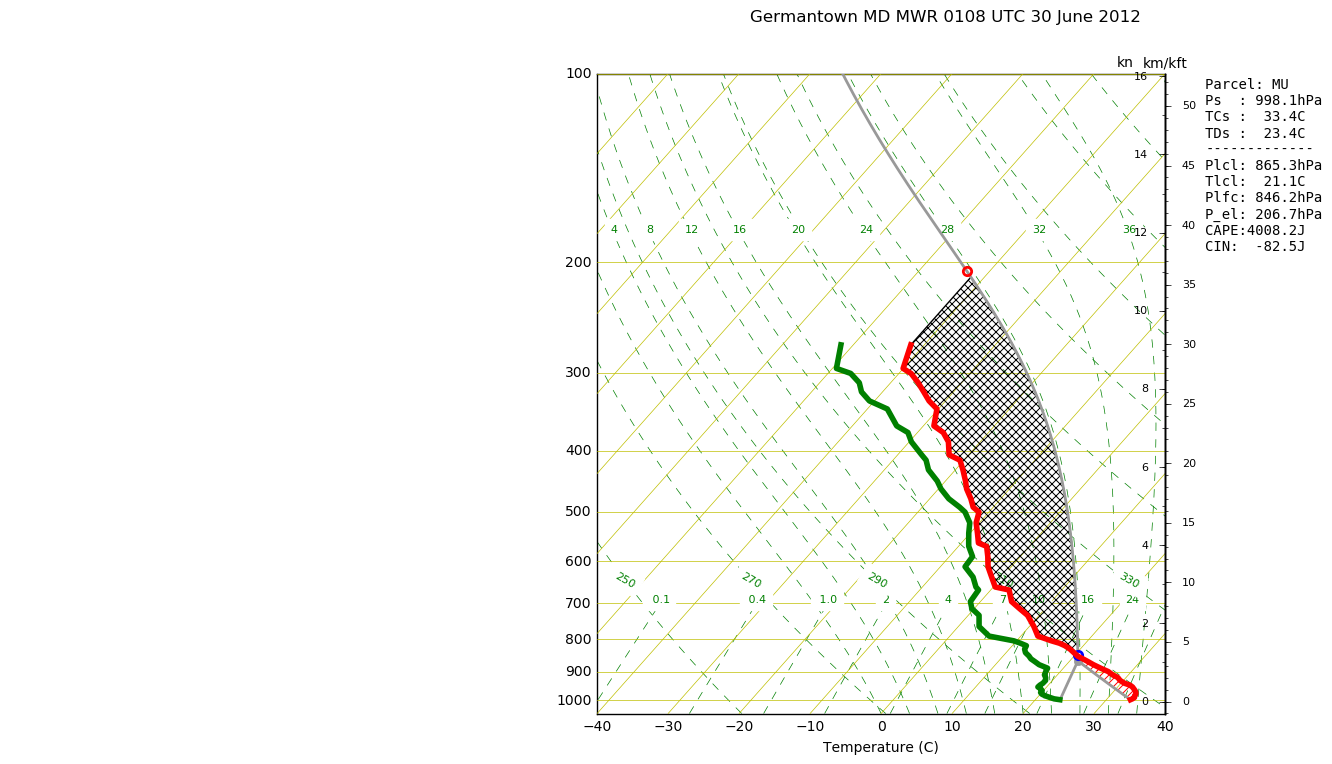

('Z_UP = ', 1.5)
('P_UP = ', 850.0)
('T_UP = ', 293.61200000000002)
('TD_UP = ', 286.77906619541517)
('Z_LO = ', 0.1)
('P_LO = ', 995.0)
('T_LO = ', 306.69900000000001)
('TD_LO = ', 295.69040374865642)
('DD_UP = ', 6.8329338045848544)
('DD_LO = ', 11.00859625134359)
('DDD = ', 4.1756624467587358)
('Gamma = ', 9.3478571428571353)
('MWPI_IRv1 = ', 53.605035894257725)
('WGP_IR = ', 53.175372842655541)
('MWPI_IRv2 = ', 6.7128555483873598)
('WGP_IRv2 = ', 58.485479189165673)
('T_UP_mid = ', array([ 20.462]))
('T_LO_mid = ', array([ 33.549]))
('TD_LO_mid = ', array([ 295.69040375]))
('Tdiff = ', array([ 13.087]))
('DD_LO = ', array([-262.14140375]))
('ST = ', 3)
('MT = ', 1)
('HI = ', 4)
('Tdiff = ', 13.086999999999989)
('DD_LO = ', 11.00859625134359)
('ST = ', 1)
('MT = ', 1)
('HI = ', 2)
('Tdiff = ', array([ 13.087]))
('DD_LO = ', array([-262.14140375]))
('ST = ', 3)
('MT = ', 1)
('HI = ', 4)
('Haines Index MID = ', 4)
('Haines Index HIGH = ', 2)
('C-Haines Index = ', 4)

---- Lifted Parce

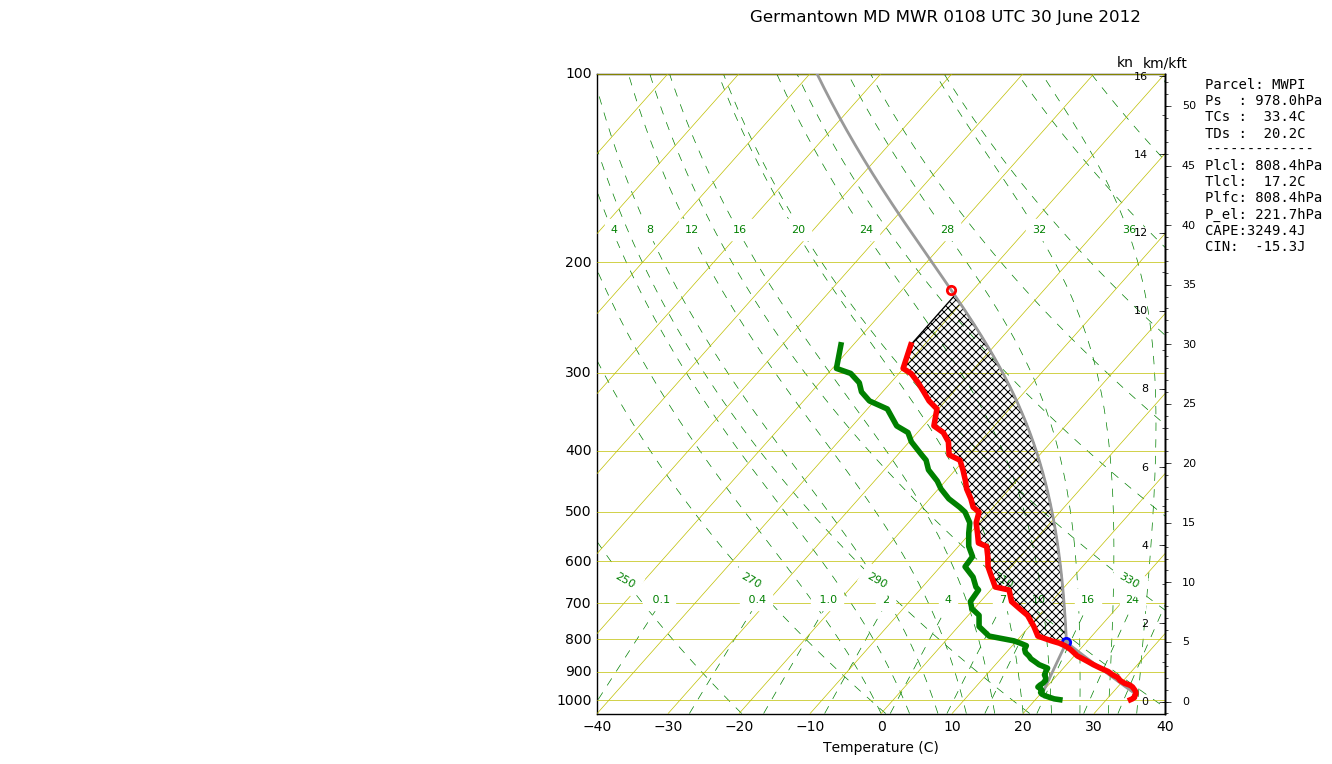


---- Lifted Parcel Quantities ----
Parcel: MU
Ps  : 998.1hPa
TCs :  33.4C
TDs :  23.4C
-------------
Plcl: 865.3hPa
Tlcl:  21.1C
Plfc: 846.2hPa
P_el: 206.7hPa
CAPE:4008.2J
CIN:  -82.5J
Figure saved


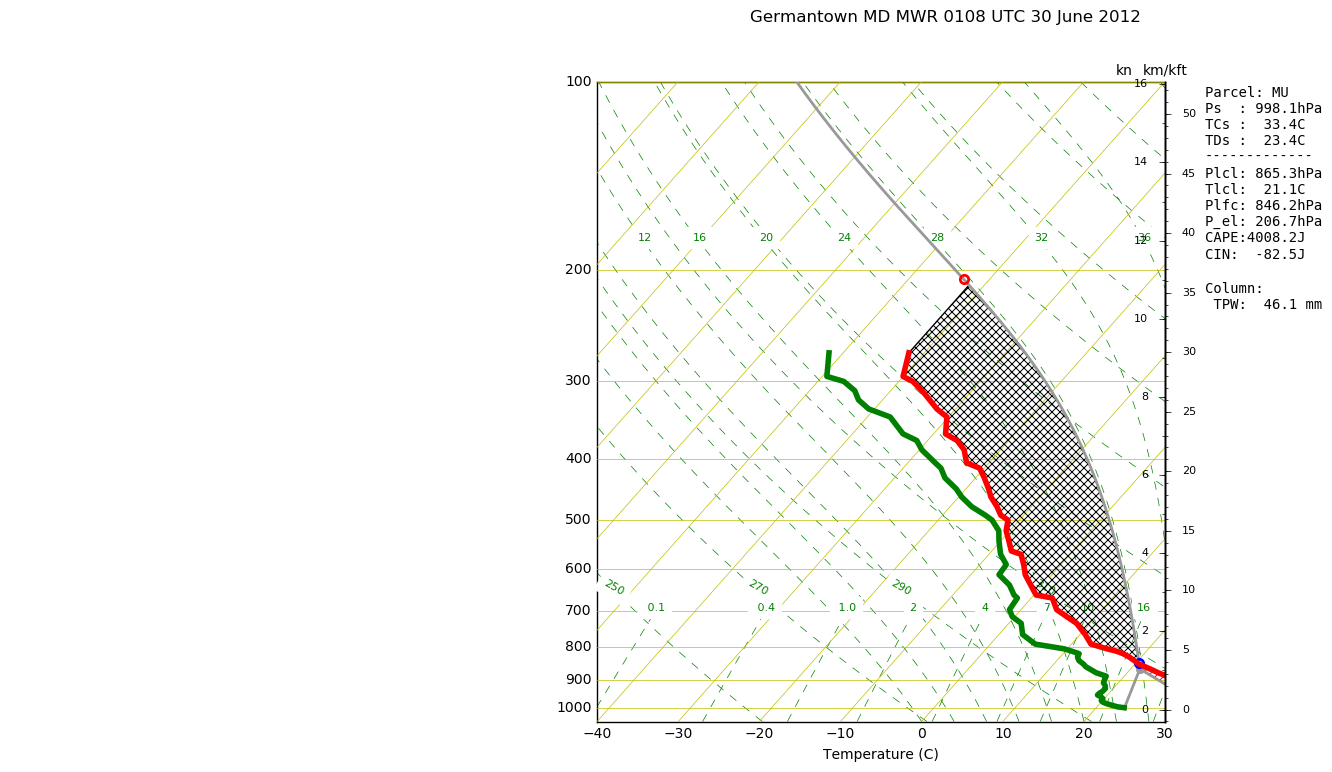

In [13]:
S=SkewT.Sounding(soundingdata=mydata)
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
parcel=S.get_parcel(method='mu')
S.lift_parcel(*parcel)
print(parcel)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('Germantown MD MWR 0108 UTC 30 June 2012')
plt.suptitle('Germantown MD MWR 0108 UTC 30 June 2012',size=12)
plt.savefig("skewt_germ_mwr_0630_0108_mu.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

#Compute the Microburst Windspeed Potential Index (MWPI)
#CAPE = 1033
Z_UP = 1.5
print("Z_UP = ", Z_UP)
P_UP = pressure_pa[19]
print("P_UP = ", P_UP)
T_UP = temperature[19]
print("T_UP = ", T_UP)
TD_UP = dewpoint[19]
print("TD_UP = ", TD_UP)
Z_LO = 0.1
print("Z_LO = ", Z_LO)
P_LO = pressure_pa[1]
print("P_LO = ", P_LO)
T_LO = temperature[1]
print("T_LO = ", T_LO)
TD_LO = dewpoint[1]
print("TD_LO = ", TD_LO)

def MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE):
    gamma = (T_LO - T_UP)/(Z_UP - Z_LO)
    DD_UP = T_UP - TD_UP
    print("DD_UP = ", DD_UP)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    DDD = DD_LO - DD_UP
    if DDD < 0:
        DDD = 0
    print("DDD = ", DDD)
    MWPI_IRv1 = (CAPE/100) + gamma + DDD
    MWPI_IRv2 = (CAPE/1000) + (gamma/5) + (DDD/5)
    WGP_IR = (0.4553 * MWPI_IRv1) + 28.769
    WGP_IRv2 = (0.35435365777*(MWPI_IRv2**2)) + (1.29598552473*MWPI_IRv2) + 33.8176788073
    return gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2
    
gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2 = MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE)

print("Gamma = ", gamma)
print("MWPI_IRv1 = ", MWPI_IRv1)
print("WGP_IR = ", WGP_IR)
print("MWPI_IRv2 = ", MWPI_IRv2)
print("WGP_IRv2 = ", WGP_IRv2)

def Haines_H(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 17:
        ST = 1
    elif Tdiff >= 17 and Tdiff <= 21:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 14:
        MT = 1
    elif DD_LO >= 14 and DD_LO <= 20:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
 
def Haines_M(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 5:
        ST = 1
    elif Tdiff >= 5 and Tdiff <= 10:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 5:
        MT = 1
    elif DD_LO >= 5 and DD_LO <= 12:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
        
def C_Haines(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if DD_LO >30:
        DD_LO=30
    CA=((T_LO-T_UP)/2)-2
    CB=((DD_LO)/3)-1
    if CB>5:
        CB=5+(CB-5)/2
    CH=CA+CB
    return CH
         
idx_pup_mid = np.where(pressure_pa == 850)
idx_plo_mid = np.where(pressure_pa == 995)
T_UP_mid = temperature_c[idx_pup_mid]
print("T_UP_mid = ", T_UP_mid)
T_LO_mid = temperature_c[idx_plo_mid]
print("T_LO_mid = ", T_LO_mid)
TD_LO_mid = dewpoint[idx_plo_mid]
print("TD_LO_mid = ", TD_LO_mid)
    
HI_M = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
HI_H = Haines_H(T_UP, T_LO, TD_LO)
CH = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
    
print("Haines Index MID = ", HI_M)
print("Haines Index HIGH = ", HI_H)
print("C-Haines Index = ", CH)

temp_p2 = temperature_c[4]
dewpt_p2 = dewpoint_c[4]

fig = plt.figure(figsize=(8, 8))
parcel_2=(978.0, temp_p2, dewpt_p2, 'mwpi')
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
S.lift_parcel(*parcel_2)
print(parcel_2)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('Germantown MD MWR 0108 UTC 30 June 2012')
plt.suptitle('Germantown MD MWR 0108 UTC 30 June 2012',size=12)
plt.savefig("skewt_mwpi_germ_mwr_0630_0108.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

fig = plt.figure(figsize=(8, 8))
S.plot_skewt()
fig.suptitle('Germantown MD MWR 0108 UTC 30 June 2012')
plt.suptitle('Germantown MD MWR 0108 UTC 30 June 2012',size=12,horizontalalignment='center',verticalalignment='center')
plt.savefig("skewt_germ_mwr_0630_0108.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

# Germantown MWR Zenith Profile 0200 UTC 30 June 2012

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from skewt import SkewT

'''
Germantown MD MWR Profile at 0200 UTC 30 June 2012
'''

tprof = 'mwr_germ_0630_Tprof.txt'
rhprof = 'mwr_germ_0630_RHprof.txt'

T_press = np.loadtxt(tprof, usecols=range(0, 29), skiprows=1, unpack=True)
RH_press = np.loadtxt(rhprof, usecols=range(0, 29), skiprows=1, unpack=True)
T = T_press[2:29,:]
T_K = T.T
RH = RH_press[2:29,:]
RH_pct = RH.T
pressure_mb = T_press[1,:]
press = pressure_mb.tolist()
print("Pressure : ", press, len(press))
height = T_press[0,:]
height_km = height.tolist()
print("Height : ", height_km, len(height_km))
height_m = height * 1000
print(len(height_m))
pressure_pa = pressure_mb
temperature = T_K[:,11]
RH_pct = RH_pct[:,11]
temperature_c = temperature - 273.15
dewpoint_c = 243.04*((np.log(RH_pct/100))+((17.625*temperature_c)/(243.04+temperature_c)))/(17.625-(np.log(RH_pct/100))-((17.625*temperature_c)/(243.04+temperature_c)))
dewpoint = dewpoint_c + 273.15
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH_pct * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH_pct+8.313659)**0.5))) + (np.arctan(temperature_c+RH_pct)) - (np.arctan(RH_pct-1.676331))+((0.00391838*(RH_pct**1.5))*(np.arctan(0.023101*RH_pct))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temperature*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c
T_sfc = temperature[1]
T_top = temperature[19]
thetaw_sfc = thetaw[19]
wetbulb_sfc = wetbulb[1]
wetbulb_top = wetbulb[19]
delta_z = 1400
delta_zkm = 1.4
gamma = (T_sfc - T_top)/(delta_zkm)
gamma_wb = (wetbulb_sfc - wetbulb_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc-thetaw_sfc)/T_sfc) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384
 
mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)

print("Gamma = ", gamma)
print("Wetbulb Gamma = ", gamma_wb)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

('Pressure : ', [998.1, 995.0, 990.0, 984.0, 978.0, 972.0, 965.5, 959.0, 952.5, 946.0, 939.7, 930.0, 920.0, 911.0, 900.0, 889.0, 877.6, 868.0, 859.0, 850.0, 839.5, 829.0, 818.5, 811.0, 804.0, 790.1, 762.8, 732.0, 714.0, 696.0, 667.0, 659.7, 636.0, 612.3, 590.0, 568.2, 561.2, 541.0, 521.0, 501.0, 492.0, 477.0, 460.0, 447.0, 429.0, 414.0, 406.0, 387.0, 374.0, 365.0, 343.0, 333.0, 322.1, 311.5, 301.0, 295.5, 271.0], 57)
('Height : ', [0.0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0], 57)
57
('Sat_mix_ratio = ', array([ 0.05046476,  0.04960403,  0.0494373 ,  0.04830827,  0.04801803,
        0.04729506,  0.04604411,  0.04471001,  0.04390776,  0.04227044,
        0.03993362,  0.03759615,  0.03582921,  0.03368329,  0.03182384,
        0.029

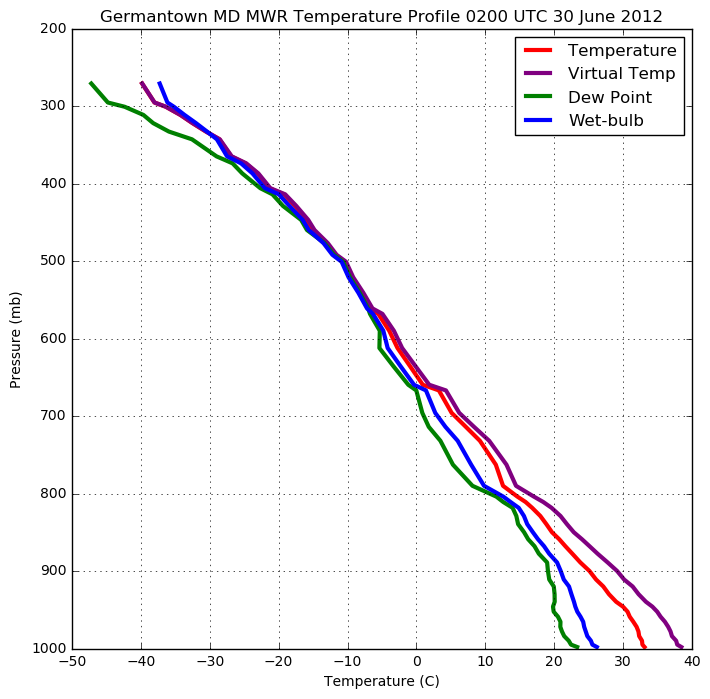

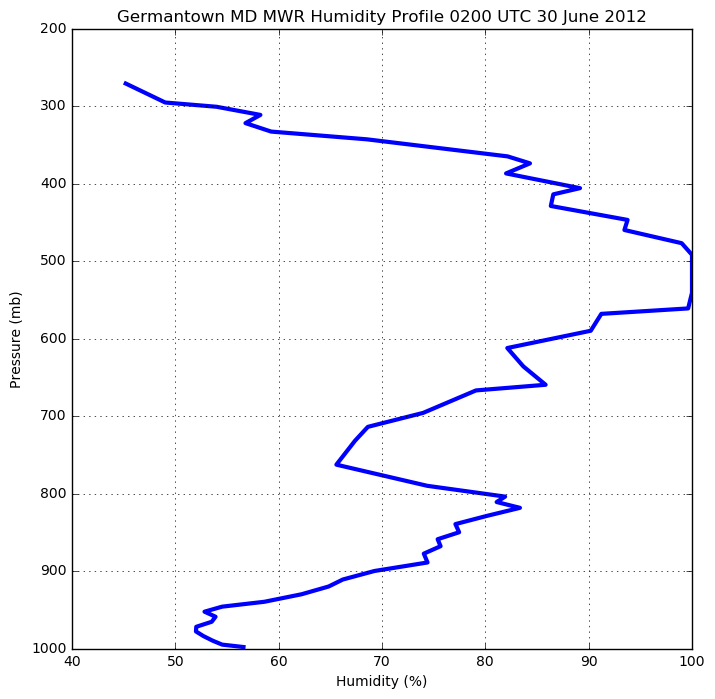

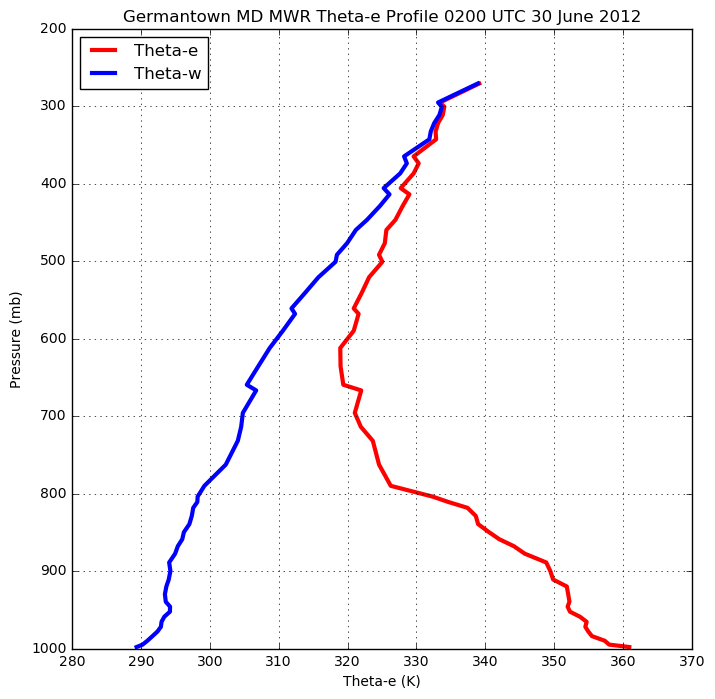

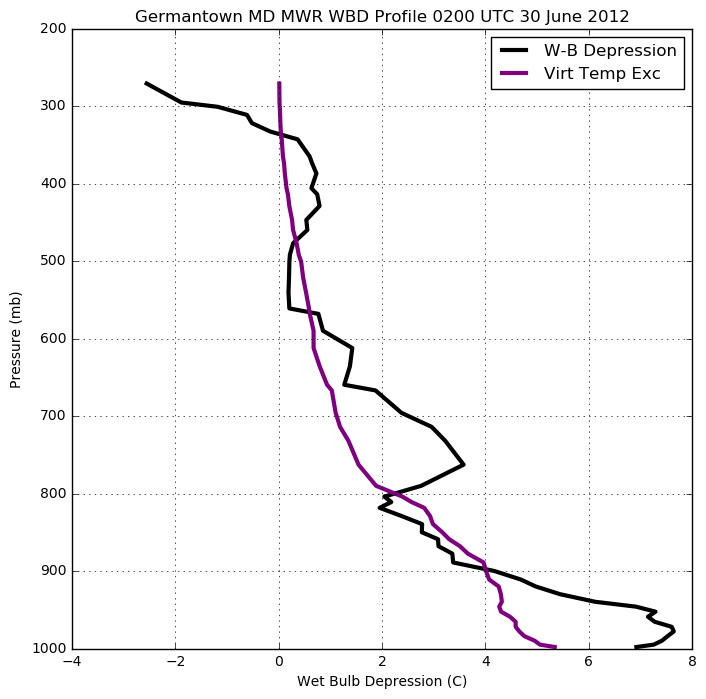

In [6]:
fig = plt.figure(figsize=(8,8))
plt.plot(temperature_c,pressure_pa,color='red',linewidth=3,label='Temperature')
plt.plot(tempvirt_c,pressure_pa,color='purple',linewidth=3,label='Virtual Temp')
plt.plot(dewpoint_c,pressure_pa,color='green',linewidth=3,label='Dew Point')
plt.plot(wetbulb,pressure_pa,color='blue',linewidth=3,label='Wet-bulb')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Temperature (C)")
plt.title("Germantown MD MWR Temperature Profile 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("mwr_germ_temp_press_0200.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(RH_pct,pressure_pa,color='blue',linewidth=3)
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Humidity (%)")
plt.title("Germantown MD MWR Humidity Profile 0200 UTC 30 June 2012")
plt.grid(True)
plt.savefig("mwr_germ_humidity_press_0200.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(thetae,pressure_pa,color='red',linewidth=3,label='Theta-e')
plt.plot(thetaw,pressure_pa,color='blue',linewidth=3,label='Theta-w')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Theta-e (K)")
plt.title("Germantown MD MWR Theta-e Profile 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig("mwr_germ_thtae_press_0200.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(WBD,pressure_pa,color='black',linewidth=3,label='W-B Depression')
plt.plot(tempvirt_exc,pressure_pa,color='purple',linewidth=3,label='Virt Temp Exc')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Wet Bulb Depression (C)")
plt.title("Germantown MD MWR WBD Profile 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("mwr_germ_wbd_press_0200.png",dpi=250,bbox_inches='tight')
plt.show()


---- Lifted Parcel Quantities ----
Parcel: MU
Ps  : 998.1hPa
TCs :  33.1C
TDs :  23.3C
-------------
Plcl: 867.4hPa
Tlcl:  21.1C
Plfc: 858.1hPa
P_el: 215.7hPa
CAPE:3585.2J
CIN:  -36.0J
(998.10000000000002, 33.109000000000037, 23.333981116396952, 'mu')
('CAPE = ', 3585.2226776925918)
Figure saved


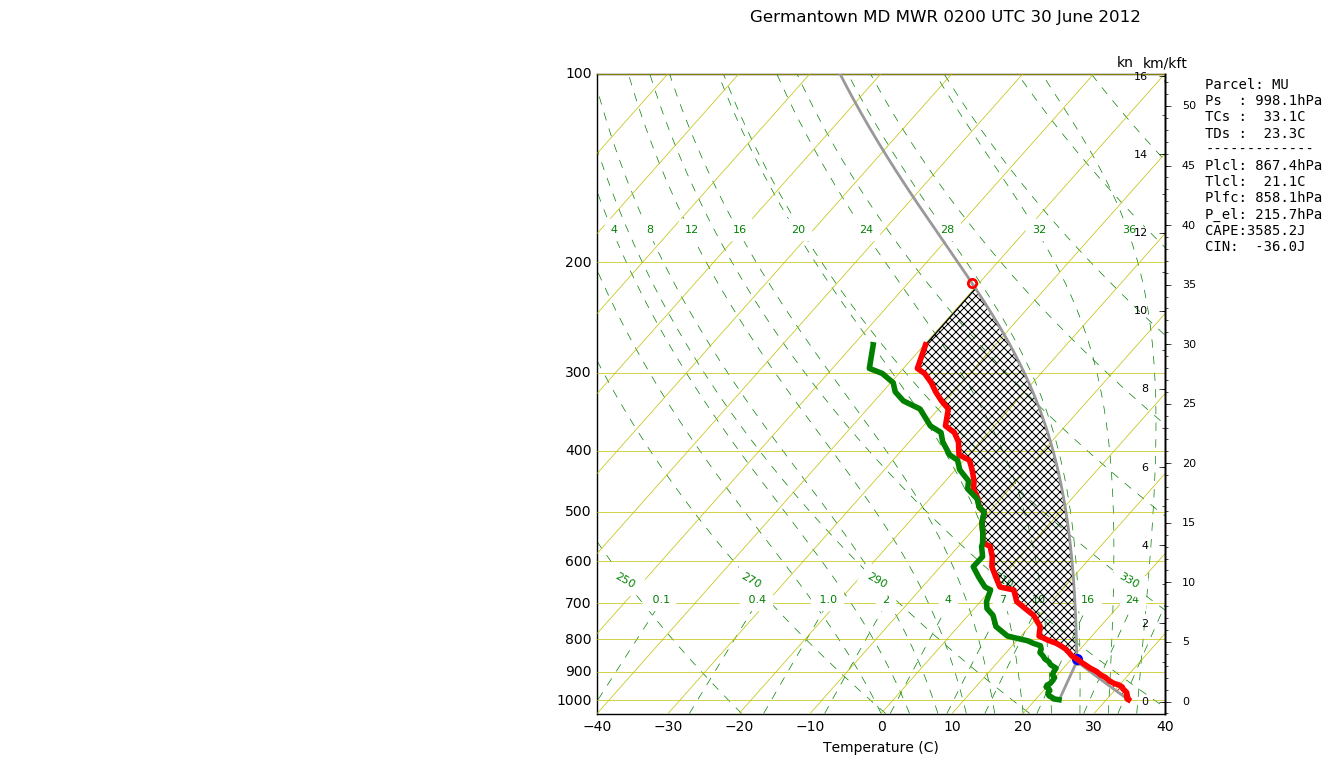

('Z_UP = ', 1.5)
('P_UP = ', 850.0)
('T_UP = ', 292.82400000000001)
('TD_UP = ', 288.77323878585025)
('Z_LO = ', 0.1)
('P_LO = ', 995.0)
('T_LO = ', 305.952)
('TD_LO = ', 295.5859747851286)
('DD_UP = ', 4.0507612141497589)
('DD_LO = ', 10.366025214871399)
('DDD = ', 6.3152640007216405)
('Gamma = ', 9.3771428571428483)
('MWPI_IRv1 = ', 51.544633634790408)
('WGP_IR = ', 52.237271693920071)
('MWPI_IRv2 = ', 6.7237040492654891)
('WGP_IRv2 = ', 58.551191591856536)
('T_UP_mid = ', array([ 19.674]))
('T_LO_mid = ', array([ 32.802]))
('TD_LO_mid = ', array([ 295.58597479]))
('Tdiff = ', array([ 13.128]))
('DD_LO = ', array([-262.78397479]))
('ST = ', 3)
('MT = ', 1)
('HI = ', 4)
('Tdiff = ', 13.127999999999986)
('DD_LO = ', 10.366025214871399)
('ST = ', 1)
('MT = ', 1)
('HI = ', 2)
('Tdiff = ', array([ 13.128]))
('DD_LO = ', array([-262.78397479]))
('ST = ', 3)
('MT = ', 1)
('HI = ', 4)
('Haines Index MID = ', 4)
('Haines Index HIGH = ', 2)
('C-Haines Index = ', 4)

---- Lifted Parcel Quantiti

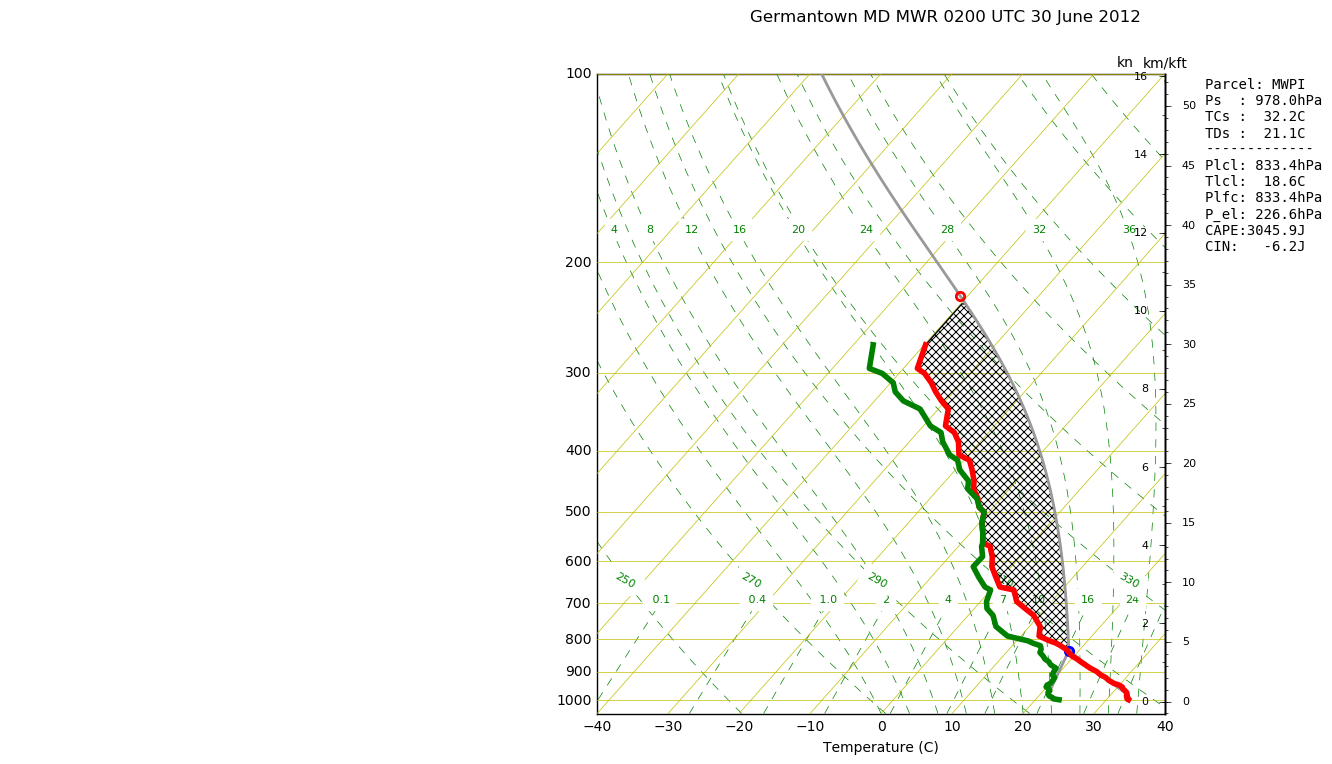


---- Lifted Parcel Quantities ----
Parcel: MU
Ps  : 998.1hPa
TCs :  33.1C
TDs :  23.3C
-------------
Plcl: 867.4hPa
Tlcl:  21.1C
Plfc: 858.1hPa
P_el: 215.7hPa
CAPE:3585.2J
CIN:  -36.0J
Figure saved


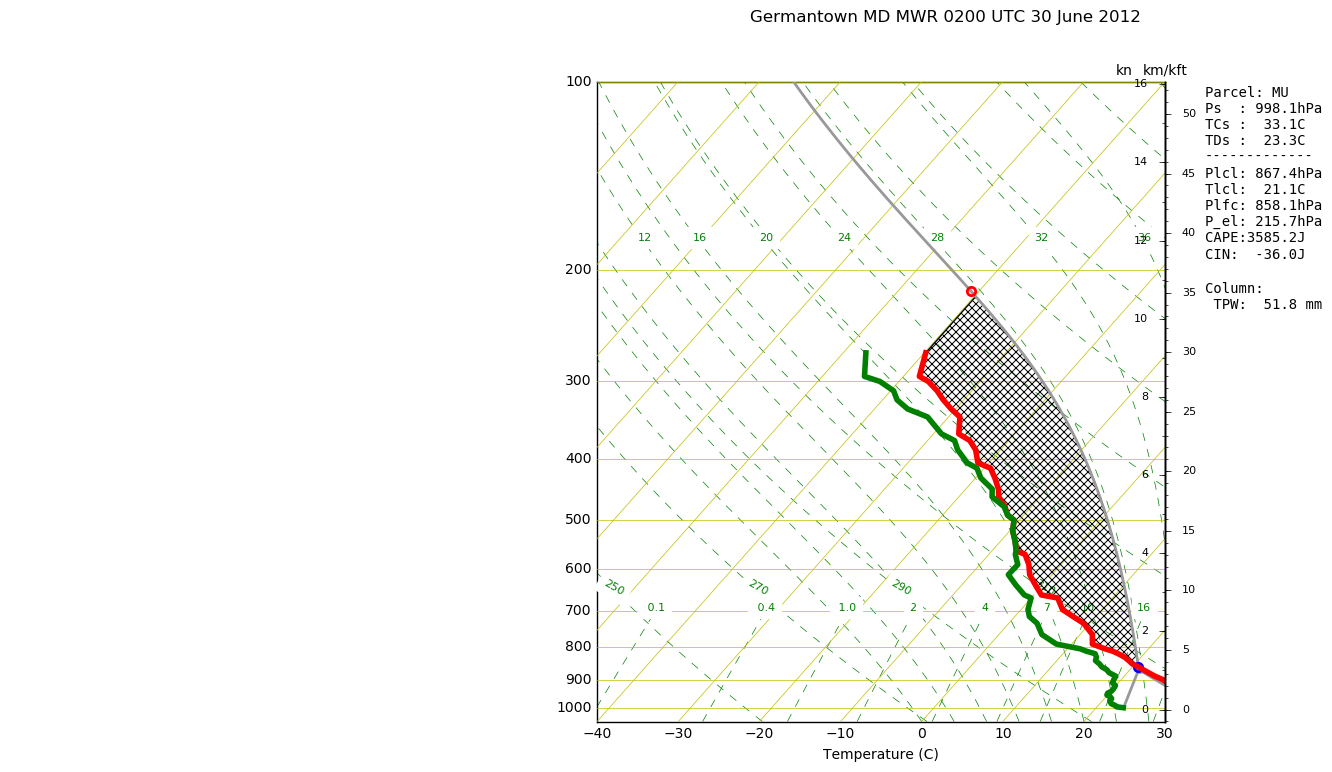

In [7]:
S=SkewT.Sounding(soundingdata=mydata)
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
parcel=S.get_parcel(method='mu')
S.lift_parcel(*parcel)
print(parcel)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('Germantown MD MWR 0200 UTC 30 June 2012')
plt.suptitle('Germantown MD MWR 0200 UTC 30 June 2012',size=12)
plt.savefig("skewt_germ_mwr_0630_0200_mu.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

#Compute the Microburst Windspeed Potential Index (MWPI)
#CAPE = 1033
Z_UP = 1.5
print("Z_UP = ", Z_UP)
P_UP = pressure_pa[19]
print("P_UP = ", P_UP)
T_UP = temperature[19]
print("T_UP = ", T_UP)
TD_UP = dewpoint[19]
print("TD_UP = ", TD_UP)
Z_LO = 0.1
print("Z_LO = ", Z_LO)
P_LO = pressure_pa[1]
print("P_LO = ", P_LO)
T_LO = temperature[1]
print("T_LO = ", T_LO)
TD_LO = dewpoint[1]
print("TD_LO = ", TD_LO)

def MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE):
    gamma = (T_LO - T_UP)/(Z_UP - Z_LO)
    DD_UP = T_UP - TD_UP
    print("DD_UP = ", DD_UP)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    DDD = DD_LO - DD_UP
    if DDD < 0:
        DDD = 0
    print("DDD = ", DDD)
    MWPI_IRv1 = (CAPE/100) + gamma + DDD
    MWPI_IRv2 = (CAPE/1000) + (gamma/5) + (DDD/5)
    WGP_IR = (0.4553 * MWPI_IRv1) + 28.769
    WGP_IRv2 = (0.35435365777*(MWPI_IRv2**2)) + (1.29598552473*MWPI_IRv2) + 33.8176788073
    return gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2
    
gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2 = MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE)

print("Gamma = ", gamma)
print("MWPI_IRv1 = ", MWPI_IRv1)
print("WGP_IR = ", WGP_IR)
print("MWPI_IRv2 = ", MWPI_IRv2)
print("WGP_IRv2 = ", WGP_IRv2)

def Haines_H(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 17:
        ST = 1
    elif Tdiff >= 17 and Tdiff <= 21:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 14:
        MT = 1
    elif DD_LO >= 14 and DD_LO <= 20:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
 
def Haines_M(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 5:
        ST = 1
    elif Tdiff >= 5 and Tdiff <= 10:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 5:
        MT = 1
    elif DD_LO >= 5 and DD_LO <= 12:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
        
def C_Haines(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if DD_LO >30:
        DD_LO=30
    CA=((T_LO-T_UP)/2)-2
    CB=((DD_LO)/3)-1
    if CB>5:
        CB=5+(CB-5)/2
    CH=CA+CB
    return CH
         
idx_pup_mid = np.where(pressure_pa == 850)
idx_plo_mid = np.where(pressure_pa == 995)
T_UP_mid = temperature_c[idx_pup_mid]
print("T_UP_mid = ", T_UP_mid)
T_LO_mid = temperature_c[idx_plo_mid]
print("T_LO_mid = ", T_LO_mid)
TD_LO_mid = dewpoint[idx_plo_mid]
print("TD_LO_mid = ", TD_LO_mid)
    
HI_M = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
HI_H = Haines_H(T_UP, T_LO, TD_LO)
CH = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
    
print("Haines Index MID = ", HI_M)
print("Haines Index HIGH = ", HI_H)
print("C-Haines Index = ", CH)

temp_p2 = temperature_c[4]
dewpt_p2 = dewpoint_c[4]

fig = plt.figure(figsize=(8, 8))
parcel_2=(978.0, temp_p2, dewpt_p2, 'mwpi')
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
S.lift_parcel(*parcel_2)
print(parcel_2)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('Germantown MD MWR 0200 UTC 30 June 2012')
plt.suptitle('Germantown MD MWR 0200 UTC 30 June 2012',size=12)
plt.savefig("skewt_mwpi_germ_mwr_0630_0200.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

fig = plt.figure(figsize=(8, 8))
S.plot_skewt()
fig.suptitle('Germantown MD MWR 0200 UTC 30 June 2012')
plt.suptitle('Germantown MD MWR 0200 UTC 30 June 2012',size=12,horizontalalignment='center',verticalalignment='center')
plt.savefig("skewt_germ_mwr_0630_0200.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

# HUBC MWR N Profile 0200 UTC 30 June 2012

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from skewt import SkewT

fig = plt.figure(figsize=(8, 8))

'''
HUBC MWR Profile at 0200 UTC 30 June 2012
'''

fname = 'mwr_hubc_0630_0200.txt'

height,pressure,temperature,RH = np.loadtxt(fname, usecols=(0,1,4,5), skiprows=1, unpack=True)

height_m = height * 1000
print(len(height_m))
pressure_pa = pressure
temperature_c = temperature - 273.15
dewpoint_c = 243.04*((np.log(RH/100))+((17.625*temperature_c)/(243.04+temperature_c)))/(17.625-(np.log(RH/100))-((17.625*temperature_c)/(243.04+temperature_c)))
dewpoint = dewpoint_c + 273.15
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temperature*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c
T_sfc = temperature[1]
T_top = temperature[19]
thetaw_sfc = thetaw[19]
delta_z = 1400
delta_zkm = 1.4
gamma = (T_sfc - T_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc-thetaw_sfc)/T_sfc) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384

mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)

print("Gamma = ", gamma)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

57
('Sat_mix_ratio = ', array([ 0.04395533,  0.05224848,  0.05398774,  0.05437229,  0.05446879,
        0.05379636,  0.05281002,  0.05186544,  0.05082744,  0.0497824 ,
        0.04723368,  0.04388774,  0.04077322,  0.03859378,  0.03629317,
        0.03488806,  0.03305453,  0.03088483,  0.02931061,  0.02768772,
        0.02620125,  0.02492521,  0.02355651,  0.02231911,  0.02105971,
        0.01860633,  0.01691829,  0.01520972,  0.01352699,  0.01215016,
        0.01089368,  0.00982636,  0.00859033,  0.00779758,  0.00708679,
        0.00635621,  0.00579641,  0.00527756,  0.00476879,  0.00436487,
        0.00383807,  0.00354174,  0.00327918,  0.00280957,  0.00256874,
        0.00223586,  0.00195919,  0.00174908,  0.0015238 ,  0.00132   ,
        0.00113534,  0.0010032 ,  0.00083639,  0.00071833,  0.00060797,
        0.00049864,  0.00039946]))
('Mix_ratio = ', array([ 0.02825527,  0.02870767,  0.02713438,  0.02622198,  0.02500839,
        0.02498212,  0.02486234,  0.02542165,  0.02569122,  

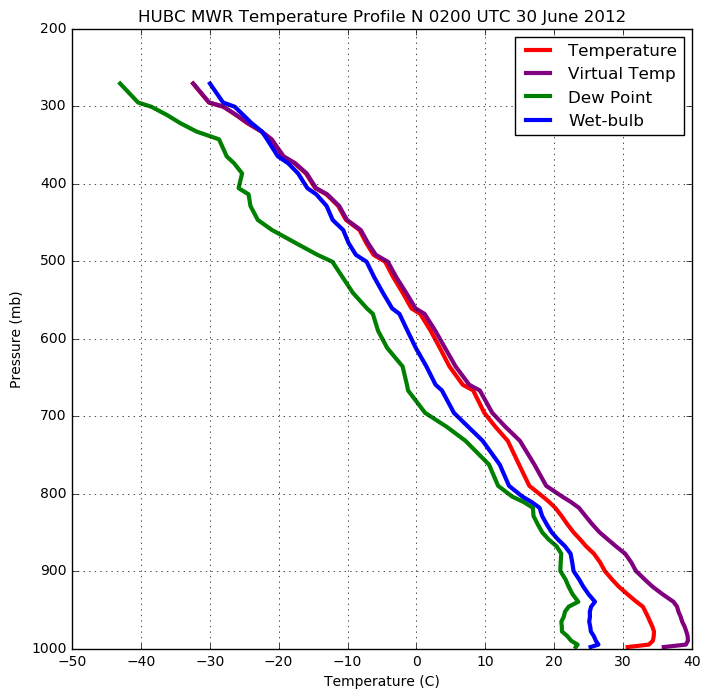

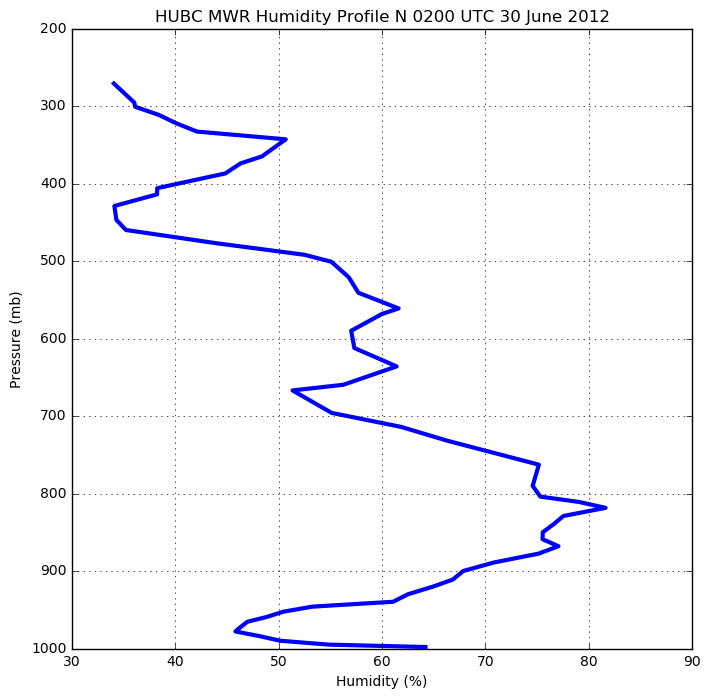

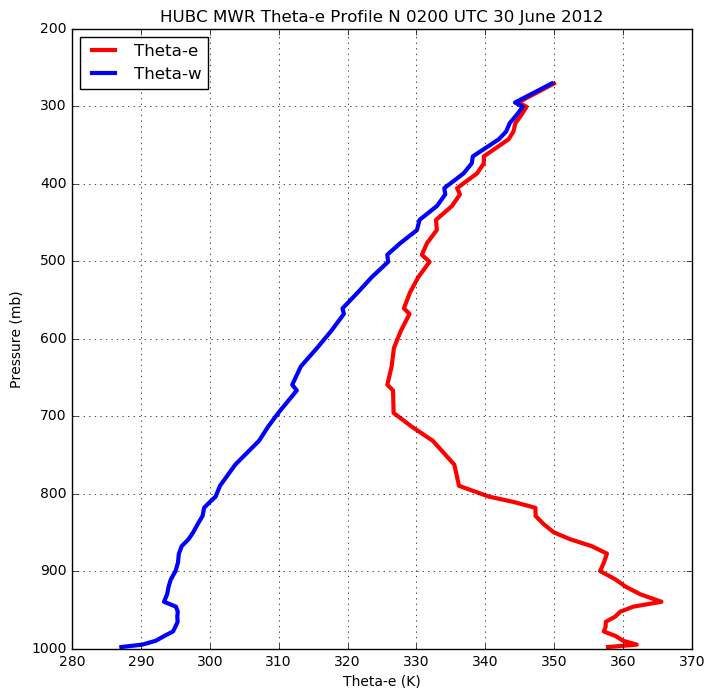

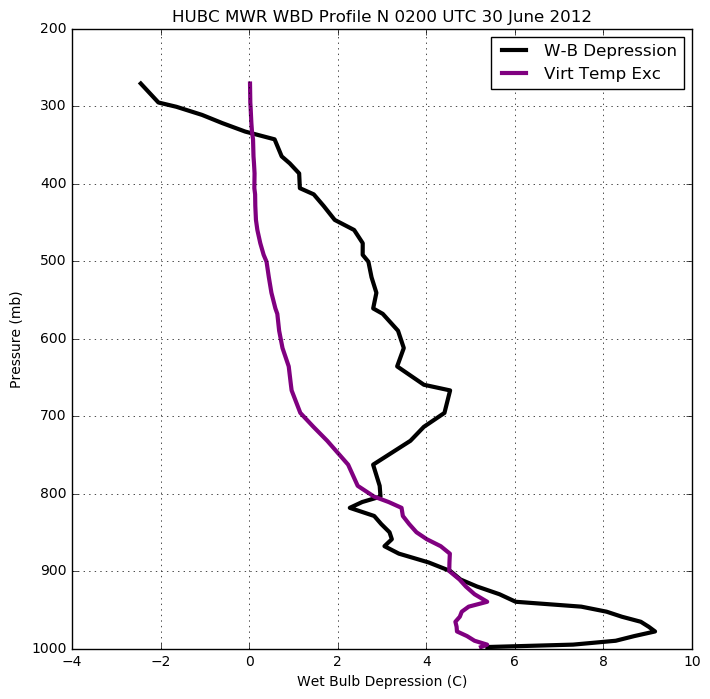

In [6]:
fig = plt.figure(figsize=(8,8))
plt.plot(temperature_c,pressure_pa,color='red',linewidth=3,label='Temperature')
plt.plot(tempvirt_c,pressure_pa,color='purple',linewidth=3,label='Virtual Temp')
plt.plot(dewpoint_c,pressure_pa,color='green',linewidth=3,label='Dew Point')
plt.plot(wetbulb,pressure_pa,color='blue',linewidth=3,label='Wet-bulb')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Temperature (C)")
plt.title("HUBC MWR Temperature Profile N 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("mwr_temp_press_0200_N.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(RH,pressure_pa,color='blue',linewidth=3)
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Humidity (%)")
plt.title("HUBC MWR Humidity Profile N 0200 UTC 30 June 2012")
plt.grid(True)
plt.savefig("mwr_humidity_press_0200_N.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(thetae,pressure_pa,color='red',linewidth=3,label='Theta-e')
plt.plot(thetaw,pressure_pa,color='blue',linewidth=3,label='Theta-w')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Theta-e (K)")
plt.title("HUBC MWR Theta-e Profile N 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig("mwr_thtae_press_0200_N.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(WBD,pressure_pa,color='black',linewidth=3,label='W-B Depression')
plt.plot(tempvirt_exc,pressure_pa,color='purple',linewidth=3,label='Virt Temp Exc')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Wet Bulb Depression (C)")
plt.title("HUBC MWR WBD Profile N 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("mwr_wbd_press_0200_N.png",dpi=250,bbox_inches='tight')
plt.show()



---- Lifted Parcel Quantities ----
Parcel: MU
Ps  : 939.7hPa
TCs :  31.9C
TDs :  23.5C
-------------
Plcl: 832.3hPa
Tlcl:  21.5C
Plfc: 832.3hPa
P_el: 225.1hPa
CAPE:2458.1J
CIN:    0.0J
(939.70000000000005, 31.932000000000016, 23.494232588649485, 'mu')
('CAPE = ', 2458.143903019416)
Figure saved


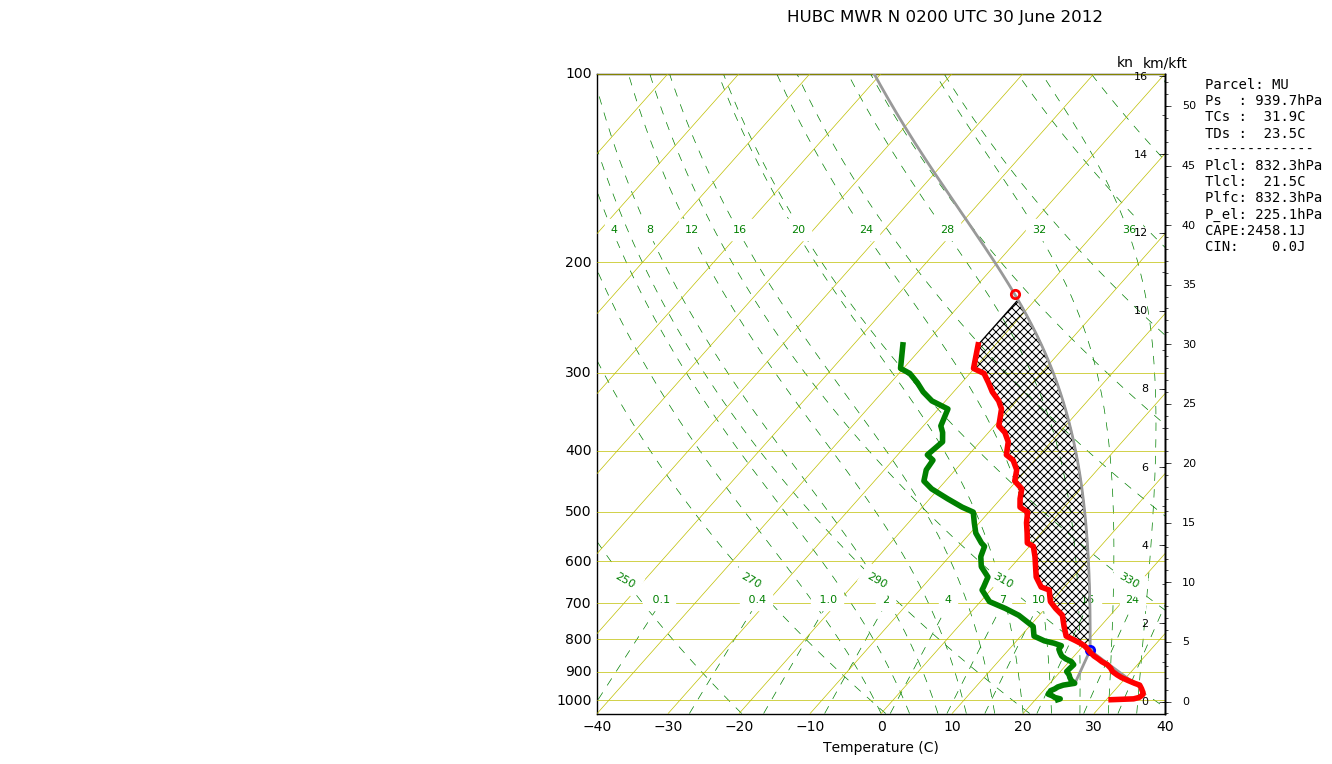

('Z_UP = ', 1.5)
('P_UP = ', 850.0)
('T_UP = ', 295.94299999999998)
('TD_UP = ', 291.39816346085371)
('Z_LO = ', 0.1)
('P_LO = ', 995.0)
('T_LO = ', 306.88099999999997)
('TD_LO = ', 296.54237267767678)
('DD_UP = ', 4.5448365391462744)
('DD_LO = ', 10.338627322323191)
('DDD = ', 5.7937907831769166)
('Gamma = ', 7.8128571428571352)
('MWPI_IRv1 = ', 38.188086956228211)
('WGP_IR = ', 46.156035991170704)
('MWPI_IRv2 = ', 5.1794734882262263)
('WGP_IRv2 = ', 50.036427779320562)
('T_UP_mid = ', array([], dtype=float64))
('T_LO_mid = ', array([], dtype=float64))
('TD_LO_mid = ', array([], dtype=float64))
('Tdiff = ', array([], dtype=float64))
('DD_LO = ', array([], dtype=float64))
('ST = ', 3)
('MT = ', 3)
('HI = ', 6)
('Tdiff = ', 10.937999999999988)
('DD_LO = ', 10.338627322323191)
('ST = ', 1)
('MT = ', 1)
('HI = ', 2)
('Tdiff = ', array([], dtype=float64))
('DD_LO = ', array([], dtype=float64))
('ST = ', 3)
('MT = ', 3)
('HI = ', 6)
('Haines Index MID = ', 6)
('Haines Index HIGH = ', 2)
('C

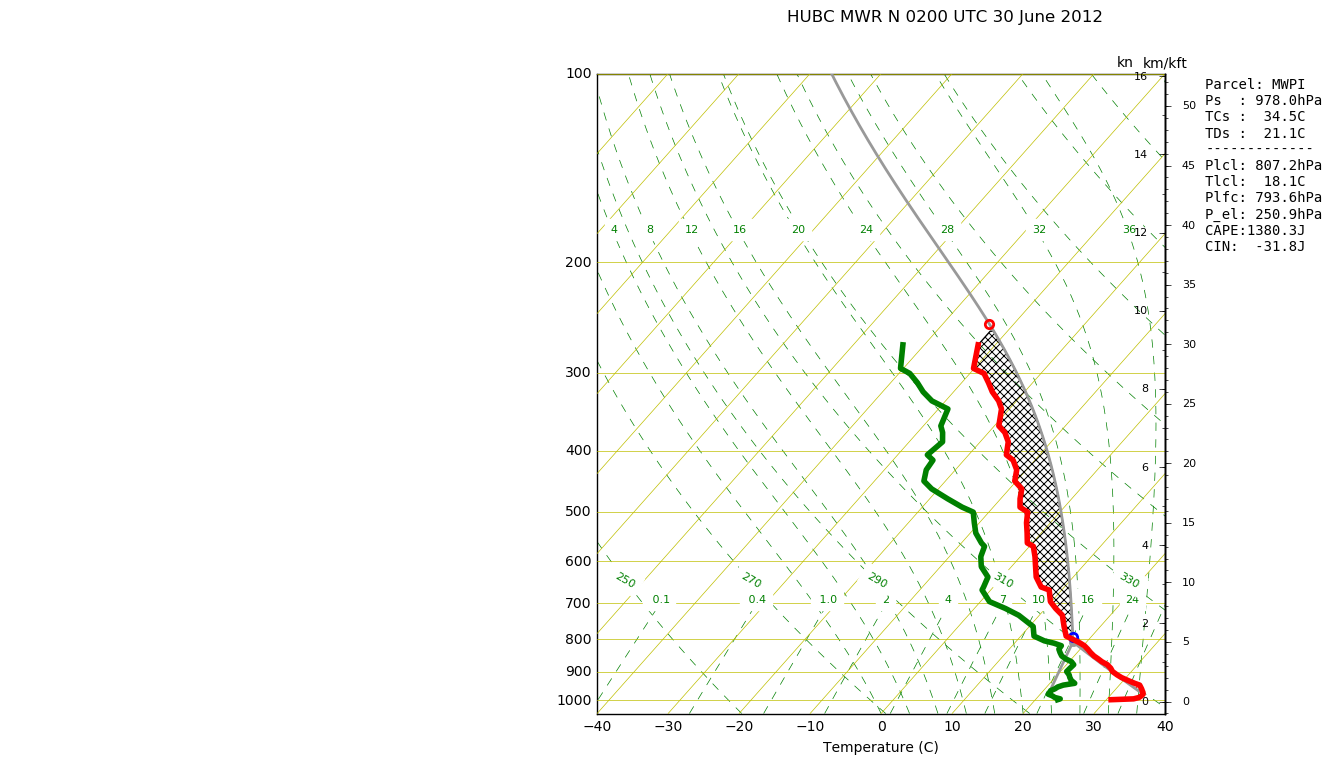

In [7]:
S=SkewT.Sounding(soundingdata=mydata)
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
parcel=S.get_parcel(method='mu')
S.lift_parcel(*parcel)
print(parcel)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('HUBC MWR N 0200 UTC 30 June 2012')
plt.suptitle('HUBC MWR N 0200 UTC 30 June 2012',size=12)
plt.savefig("skewt_hubc_mwr_0630_0200_mu_N.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

#Compute the Microburst Windspeed Potential Index (MWPI)
#CAPE = 1033
Z_UP = 1.5
print("Z_UP = ", Z_UP)
P_UP = pressure[19]
print("P_UP = ", P_UP)
T_UP = temperature[19]
print("T_UP = ", T_UP)
TD_UP = dewpoint[19]
print("TD_UP = ", TD_UP)
Z_LO = 0.1
print("Z_LO = ", Z_LO)
P_LO = pressure[1]
print("P_LO = ", P_LO)
T_LO = temperature[1]
print("T_LO = ", T_LO)
TD_LO = dewpoint[1]
print("TD_LO = ", TD_LO)

def MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE):
    gamma = (T_LO - T_UP)/(Z_UP - Z_LO)
    DD_UP = T_UP - TD_UP
    print("DD_UP = ", DD_UP)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    DDD = DD_LO - DD_UP
    if DDD < 0:
        DDD = 0
    print("DDD = ", DDD)
    MWPI_IRv1 = (CAPE/100) + gamma + DDD
    MWPI_IRv2 = (CAPE/1000) + (gamma/5) + (DDD/5)
    WGP_IR = (0.4553 * MWPI_IRv1) + 28.769
    WGP_IRv2 = (0.35435365777*(MWPI_IRv2**2)) + (1.29598552473*MWPI_IRv2) + 33.8176788073
    return gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2
    
gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2 = MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE)

print("Gamma = ", gamma)
print("MWPI_IRv1 = ", MWPI_IRv1)
print("WGP_IR = ", WGP_IR)
print("MWPI_IRv2 = ", MWPI_IRv2)
print("WGP_IRv2 = ", WGP_IRv2)

def Haines_H(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 17:
        ST = 1
    elif Tdiff >= 17 and Tdiff <= 21:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 14:
        MT = 1
    elif DD_LO >= 14 and DD_LO <= 20:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
 
def Haines_M(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 5:
        ST = 1
    elif Tdiff >= 5 and Tdiff <= 10:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 5:
        MT = 1
    elif DD_LO >= 5 and DD_LO <= 12:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
        
def C_Haines(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if DD_LO >30:
        DD_LO=30
    CA=((T_LO-T_UP)/2)-2
    CB=((DD_LO)/3)-1
    if CB>5:
        CB=5+(CB-5)/2
    CH=CA+CB
    return CH
         
idx_pup_mid = np.where(pressure == 650)
idx_plo_mid = np.where(pressure == 839)
T_UP_mid = temperature_c[idx_pup_mid]
print("T_UP_mid = ", T_UP_mid)
T_LO_mid = temperature_c[idx_plo_mid]
print("T_LO_mid = ", T_LO_mid)
TD_LO_mid = dewpoint[idx_plo_mid]
print("TD_LO_mid = ", TD_LO_mid)
    
HI_M = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
HI_H = Haines_H(T_UP, T_LO, TD_LO)
CH = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
    
print("Haines Index MID = ", HI_M)
print("Haines Index HIGH = ", HI_H)
print("C-Haines Index = ", CH)

temp_p2 = temperature_c[4]
dewpt_p2 = dewpoint_c[4]

fig = plt.figure(figsize=(8, 8))
parcel_2=(978.0, temp_p2, dewpt_p2, 'mwpi')
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
S.lift_parcel(*parcel_2)
print(parcel_2)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('HUBC MWR N 0200 UTC 30 June 2012')
plt.suptitle('HUBC MWR N 0200 UTC 30 June 2012',size=12)
plt.savefig("skewt_mwpi_hubc_mwr_0630_0200_N.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from skewt import SkewT

fig = plt.figure(figsize=(8, 8))

'''
HUBC MWR Profile at 0200 UTC 30 June 2012
'''

fname = 'mwr_hubc_0630_0200.txt'

height,pressure,temperature,RH = np.loadtxt(fname, usecols=(0,1,4,5), skiprows=1, unpack=True)

height_m = height * 1000
print(len(height_m))
pressure_pa = pressure
temperature_c = temperature - 273.15
dewpoint_c = 243.04*((np.log(RH/100))+((17.625*temperature_c)/(243.04+temperature_c)))/(17.625-(np.log(RH/100))-((17.625*temperature_c)/(243.04+temperature_c)))
dewpoint = dewpoint_c + 273.15
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temperature*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c
T_sfc = temperature[1]
T_top = temperature[19]
thetaw_sfc = thetaw[19]
delta_z = 1400
delta_zkm = 1.4
gamma = (T_sfc - T_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc-thetaw_sfc)/T_sfc) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384

mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)

print("Gamma = ", gamma)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

57
('Sat_mix_ratio = ', array([ 0.04395533,  0.05224848,  0.05398774,  0.05437229,  0.05446879,
        0.05379636,  0.05281002,  0.05186544,  0.05082744,  0.0497824 ,
        0.04723368,  0.04388774,  0.04077322,  0.03859378,  0.03629317,
        0.03488806,  0.03305453,  0.03088483,  0.02931061,  0.02768772,
        0.02620125,  0.02492521,  0.02355651,  0.02231911,  0.02105971,
        0.01860633,  0.01691829,  0.01520972,  0.01352699,  0.01215016,
        0.01089368,  0.00982636,  0.00859033,  0.00779758,  0.00708679,
        0.00635621,  0.00579641,  0.00527756,  0.00476879,  0.00436487,
        0.00383807,  0.00354174,  0.00327918,  0.00280957,  0.00256874,
        0.00223586,  0.00195919,  0.00174908,  0.0015238 ,  0.00132   ,
        0.00113534,  0.0010032 ,  0.00083639,  0.00071833,  0.00060797,
        0.00049864,  0.00039946]))
('Mix_ratio = ', array([ 0.02825527,  0.02870767,  0.02713438,  0.02622198,  0.02500839,
        0.02498212,  0.02486234,  0.02542165,  0.02569122,  

# HUBC MWR S Profile 0200 UTC 30 June 2012

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from skewt import SkewT

fig = plt.figure(figsize=(8, 8))

'''
HUBC MWR Profile at 0200 UTC 30 June 2012
'''

fname = 'mwr_hubc_0630_0200.txt'

height,pressure,temperature,RH = np.loadtxt(fname, usecols=(0,1,6,7), skiprows=1, unpack=True)

height_m = height * 1000
print(len(height_m))
pressure_pa = pressure
temperature_c = temperature - 273.15
dewpoint_c = 243.04*((np.log(RH/100))+((17.625*temperature_c)/(243.04+temperature_c)))/(17.625-(np.log(RH/100))-((17.625*temperature_c)/(243.04+temperature_c)))
dewpoint = dewpoint_c + 273.15
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temperature*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c
T_sfc = temperature[1]
T_top = temperature[19]
thetaw_sfc = thetaw[19]
delta_z = 1400
delta_zkm = 1.4
gamma = (T_sfc - T_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc-thetaw_sfc)/T_sfc) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384
 
mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)

print("Gamma = ", gamma)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

57
('Sat_mix_ratio = ', array([ 0.04395533,  0.05263691,  0.05456847,  0.05522788,  0.05517292,
        0.05449294,  0.0537307 ,  0.05273074,  0.05169502,  0.05041676,
        0.04706858,  0.04346666,  0.0401068 ,  0.03755244,  0.03498653,
        0.03341989,  0.03104919,  0.02891338,  0.02712168,  0.02566032,
        0.02392847,  0.0226009 ,  0.02115483,  0.01948528,  0.01827532,
        0.01540513,  0.01347521,  0.01192576,  0.01040955,  0.00916366,
        0.00810623,  0.00734646,  0.00648467,  0.0058513 ,  0.00528771,
        0.00481964,  0.00439529,  0.00394855,  0.00354832,  0.00321454,
        0.00279801,  0.00249118,  0.00223641,  0.00187545,  0.00167356,
        0.00145505,  0.00124114,  0.00108606,  0.00095185,  0.00082812,
        0.00071478,  0.00061763,  0.00051478,  0.00043966,  0.00036951,
        0.00030027,  0.00023328]))
('Mix_ratio = ', array([  2.80615944e-02,   2.74243067e-02,   2.56017553e-02,
         2.45205309e-02,   2.29739622e-02,   2.28254389e-02,
         2

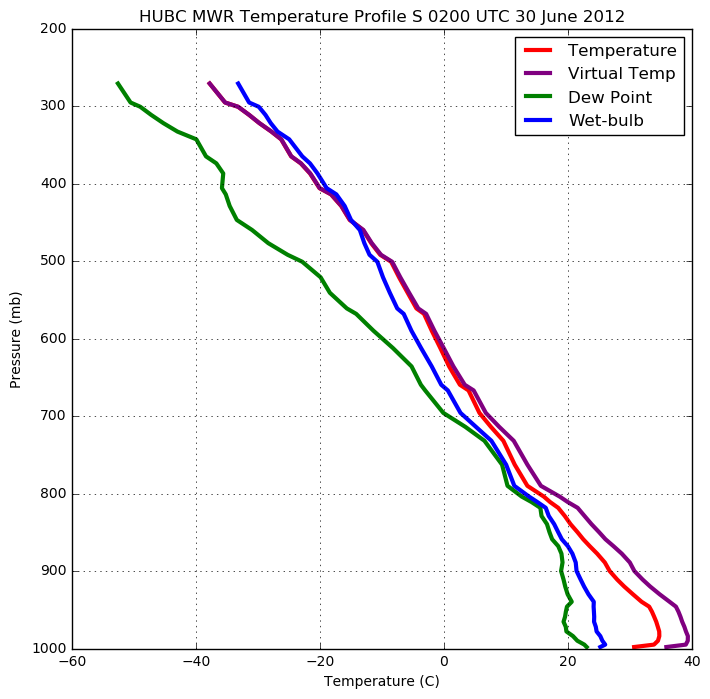

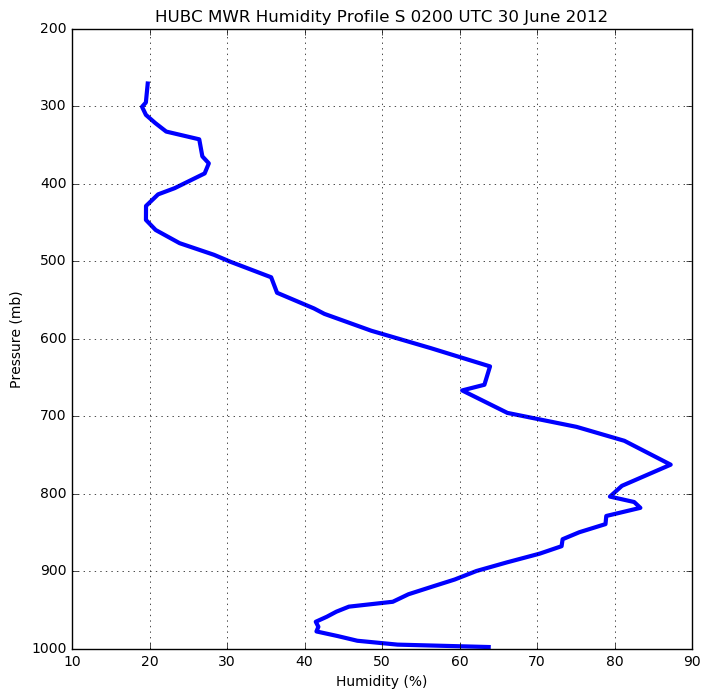

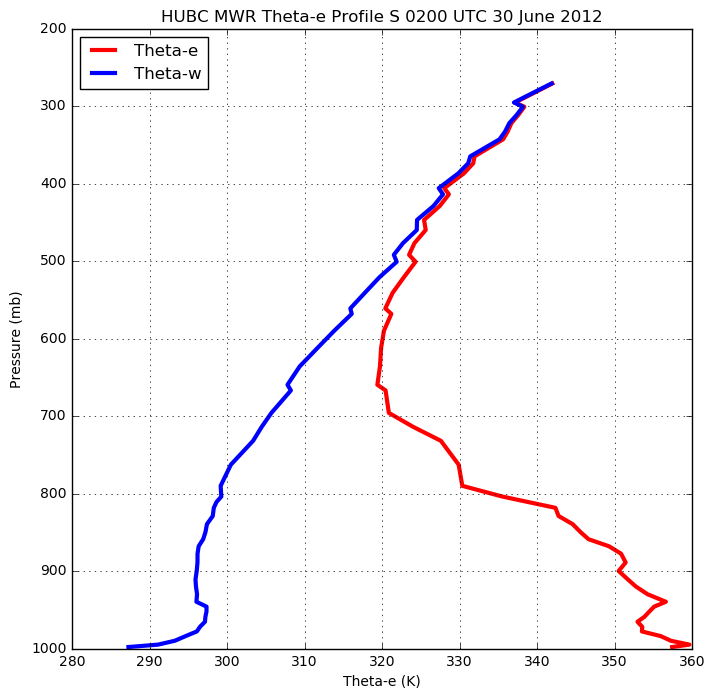

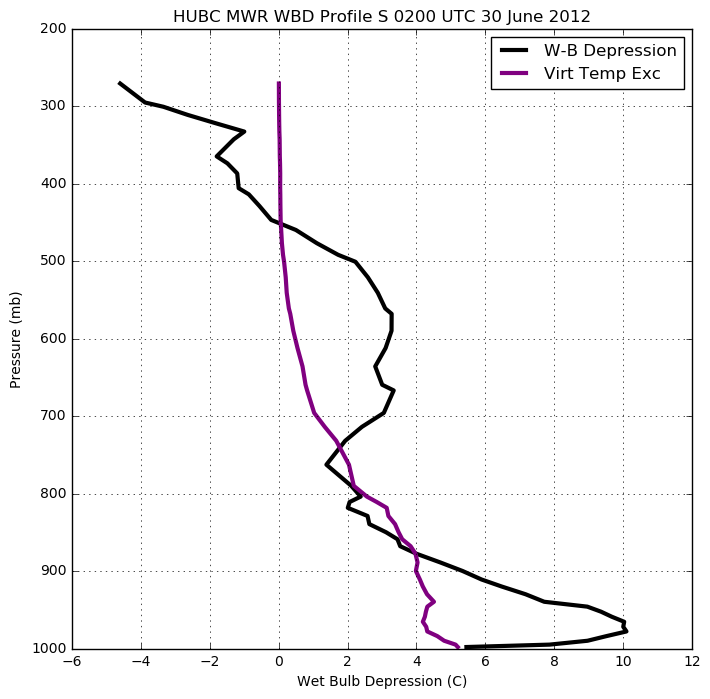

In [10]:
fig = plt.figure(figsize=(8,8))
plt.plot(temperature_c,pressure_pa,color='red',linewidth=3,label='Temperature')
plt.plot(tempvirt_c,pressure_pa,color='purple',linewidth=3,label='Virtual Temp')
plt.plot(dewpoint_c,pressure_pa,color='green',linewidth=3,label='Dew Point')
plt.plot(wetbulb,pressure_pa,color='blue',linewidth=3,label='Wet-bulb')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Temperature (C)")
plt.title("HUBC MWR Temperature Profile S 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("mwr_temp_press_0200_S.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(RH,pressure_pa,color='blue',linewidth=3)
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Humidity (%)")
plt.title("HUBC MWR Humidity Profile S 0200 UTC 30 June 2012")
plt.grid(True)
plt.savefig("mwr_humidity_press_0200_S.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(thetae,pressure_pa,color='red',linewidth=3,label='Theta-e')
plt.plot(thetaw,pressure_pa,color='blue',linewidth=3,label='Theta-w')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Theta-e (K)")
plt.title("HUBC MWR Theta-e Profile S 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig("mwr_thtae_press_0200_S.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(WBD,pressure_pa,color='black',linewidth=3,label='W-B Depression')
plt.plot(tempvirt_exc,pressure_pa,color='purple',linewidth=3,label='Virt Temp Exc')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Wet Bulb Depression (C)")
plt.title("HUBC MWR WBD Profile S 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("mwr_wbd_press_0200_S.png",dpi=250,bbox_inches='tight')
plt.show()



---- Lifted Parcel Quantities ----
Parcel: MU
Ps  : 995.0hPa
TCs :  33.9C
TDs :  22.6C
-------------
Plcl: 846.9hPa
Tlcl:  20.0C
Plfc: 831.0hPa
P_el: 225.3hPa
CAPE:2911.0J
CIN:  -94.6J
(995.0, 33.864000000000033, 22.635074183452065, 'mu')
('CAPE = ', 2910.9518267809062)
Figure saved


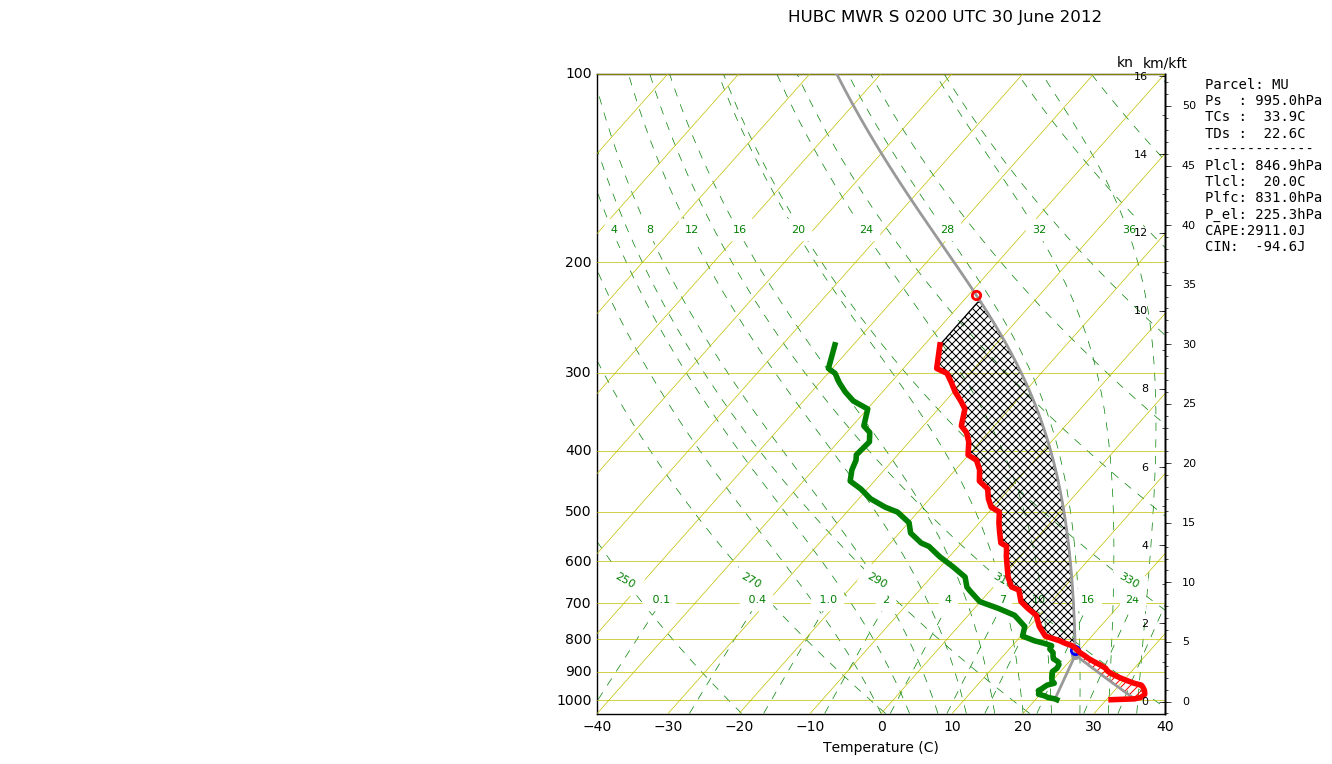

('Z_UP = ', 1.5)
('P_UP = ', 850.0)
('T_UP = ', 294.69200000000001)
('TD_UP = ', 290.1677278449327)
('Z_LO = ', 0.1)
('P_LO = ', 995.0)
('T_LO = ', 307.01400000000001)
('TD_LO = ', 295.78507418345202)
('DD_UP = ', 4.5242721550673082)
('DD_LO = ', 11.228925816547985)
('DDD = ', 6.7046536614806769)
('Gamma = ', 8.8014285714285734)
('MWPI_IRv1 = ', 44.615600500718315)
('WGP_IR = ', 49.082482907977045)
('MWPI_IRv2 = ', 6.0121682733627555)
('WGP_IRv2 = ', 54.41788847567647)
('T_UP_mid = ', array([], dtype=float64))
('T_LO_mid = ', array([], dtype=float64))
('TD_LO_mid = ', array([], dtype=float64))
('Tdiff = ', array([], dtype=float64))
('DD_LO = ', array([], dtype=float64))
('ST = ', 3)
('MT = ', 3)
('HI = ', 6)
('Tdiff = ', 12.322000000000003)
('DD_LO = ', 11.228925816547985)
('ST = ', 1)
('MT = ', 1)
('HI = ', 2)
('Tdiff = ', array([], dtype=float64))
('DD_LO = ', array([], dtype=float64))
('ST = ', 3)
('MT = ', 3)
('HI = ', 6)
('Haines Index MID = ', 6)
('Haines Index HIGH = ', 2)
('C-H

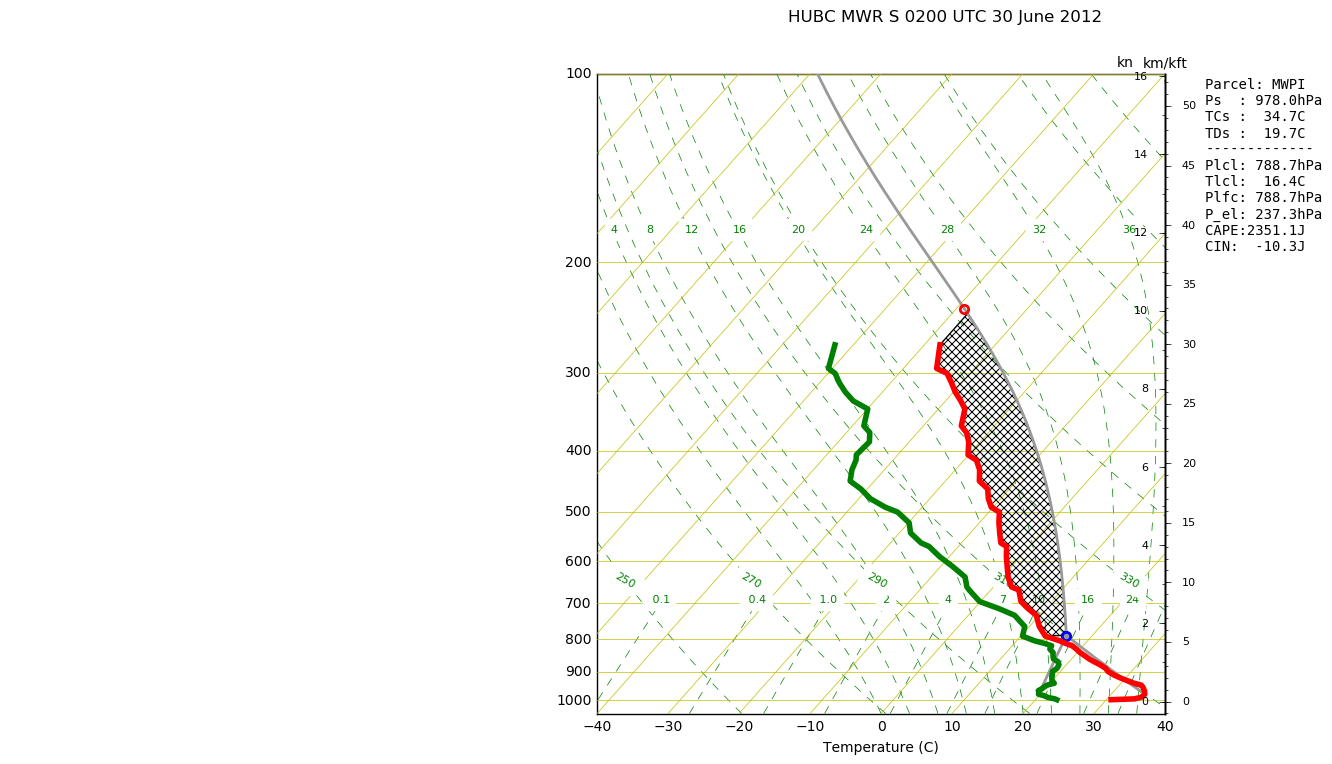

In [11]:
S=SkewT.Sounding(soundingdata=mydata)
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
parcel=S.get_parcel(method='mu')
S.lift_parcel(*parcel)
print(parcel)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('HUBC MWR S 0200 UTC 30 June 2012')
plt.suptitle('HUBC MWR S 0200 UTC 30 June 2012',size=12)
plt.savefig("skewt_hubc_mwr_0630_0200_mu_S.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

#Compute the Microburst Windspeed Potential Index (MWPI)
#CAPE = 1033
Z_UP = 1.5
print("Z_UP = ", Z_UP)
P_UP = pressure[19]
print("P_UP = ", P_UP)
T_UP = temperature[19]
print("T_UP = ", T_UP)
TD_UP = dewpoint[19]
print("TD_UP = ", TD_UP)
Z_LO = 0.1
print("Z_LO = ", Z_LO)
P_LO = pressure[1]
print("P_LO = ", P_LO)
T_LO = temperature[1]
print("T_LO = ", T_LO)
TD_LO = dewpoint[1]
print("TD_LO = ", TD_LO)

def MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE):
    gamma = (T_LO - T_UP)/(Z_UP - Z_LO)
    DD_UP = T_UP - TD_UP
    print("DD_UP = ", DD_UP)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    DDD = DD_LO - DD_UP
    if DDD < 0:
        DDD = 0
    print("DDD = ", DDD)
    MWPI_IRv1 = (CAPE/100) + gamma + DDD
    MWPI_IRv2 = (CAPE/1000) + (gamma/5) + (DDD/5)
    WGP_IR = (0.4553 * MWPI_IRv1) + 28.769
    WGP_IRv2 = (0.35435365777*(MWPI_IRv2**2)) + (1.29598552473*MWPI_IRv2) + 33.8176788073
    return gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2
    
gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2 = MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE)

print("Gamma = ", gamma)
print("MWPI_IRv1 = ", MWPI_IRv1)
print("WGP_IR = ", WGP_IR)
print("MWPI_IRv2 = ", MWPI_IRv2)
print("WGP_IRv2 = ", WGP_IRv2)

def Haines_H(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 17:
        ST = 1
    elif Tdiff >= 17 and Tdiff <= 21:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 14:
        MT = 1
    elif DD_LO >= 14 and DD_LO <= 20:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
 
def Haines_M(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 5:
        ST = 1
    elif Tdiff >= 5 and Tdiff <= 10:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 5:
        MT = 1
    elif DD_LO >= 5 and DD_LO <= 12:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
        
def C_Haines(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if DD_LO >30:
        DD_LO=30
    CA=((T_LO-T_UP)/2)-2
    CB=((DD_LO)/3)-1
    if CB>5:
        CB=5+(CB-5)/2
    CH=CA+CB
    return CH
         
idx_pup_mid = np.where(pressure == 650)
idx_plo_mid = np.where(pressure == 839)
T_UP_mid = temperature_c[idx_pup_mid]
print("T_UP_mid = ", T_UP_mid)
T_LO_mid = temperature_c[idx_plo_mid]
print("T_LO_mid = ", T_LO_mid)
TD_LO_mid = dewpoint[idx_plo_mid]
print("TD_LO_mid = ", TD_LO_mid)
    
HI_M = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
HI_H = Haines_H(T_UP, T_LO, TD_LO)
CH = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
    
print("Haines Index MID = ", HI_M)
print("Haines Index HIGH = ", HI_H)
print("C-Haines Index = ", CH)

temp_p2 = temperature_c[4]
dewpt_p2 = dewpoint_c[4]

fig = plt.figure(figsize=(8, 8))
parcel_2=(978.0, temp_p2, dewpt_p2, 'mwpi')
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
S.lift_parcel(*parcel_2)
print(parcel_2)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('HUBC MWR S 0200 UTC 30 June 2012')
plt.suptitle('HUBC MWR S 0200 UTC 30 June 2012',size=12)
plt.savefig("skewt_mwpi_hubc_mwr_0630_0200_S.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

# HUBC MWR A Profile 0200 UTC 30 June 2012

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from skewt import SkewT

fig = plt.figure(figsize=(8, 8))

'''
HUBC MWR Profile at 0200 UTC 30 June 2012
'''

fname = 'mwr_hubc_0630_0200.txt'

height,pressure,temperature,RH = np.loadtxt(fname, usecols=(0,1,8,9), skiprows=1, unpack=True)

height_m = height * 1000
print(len(height_m))
pressure_pa = pressure
temperature_c = temperature - 273.15
dewpoint_c = 243.04*((np.log(RH/100))+((17.625*temperature_c)/(243.04+temperature_c)))/(17.625-(np.log(RH/100))-((17.625*temperature_c)/(243.04+temperature_c)))
dewpoint = dewpoint_c + 273.15
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temperature*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c
T_sfc = temperature[1]
T_top = temperature[19]
thetaw_sfc = thetaw[19]
delta_z = 1400
delta_zkm = 1.4
gamma = (T_sfc - T_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc-thetaw_sfc)/T_sfc) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384
 
mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)

print("Gamma = ", gamma)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

57
('Sat_mix_ratio = ', array([ 0.04395533,  0.05233005,  0.05420977,  0.05479257,  0.05486542,
        0.05420075,  0.0533501 ,  0.05242048,  0.05136711,  0.05017455,
        0.04722302,  0.04366057,  0.04037362,  0.03798939,  0.03553249,
        0.03403865,  0.03194508,  0.02980535,  0.0281364 ,  0.02660619,
        0.02500784,  0.02374039,  0.02233577,  0.02085096,  0.01961872,
        0.01694334,  0.01511974,  0.01348769,  0.01189377,  0.01058198,
        0.00942204,  0.00852041,  0.00748606,  0.00677812,  0.00614516,
        0.00556585,  0.00507481,  0.00458968,  0.00413226,  0.00376084,
        0.00328788,  0.00297819,  0.00271733,  0.00230053,  0.00207892,
        0.00180963,  0.00156116,  0.00137901,  0.001202  ,  0.00104228,
        0.0008986 ,  0.00078497,  0.00065329,  0.0005585 ,  0.00047113,
        0.00038357,  0.00030241]))
('Mix_ratio = ', array([  2.81858785e-02,   2.80065763e-02,   2.63174956e-02,
         2.53042417e-02,   2.39338229e-02,   2.38612812e-02,
         2

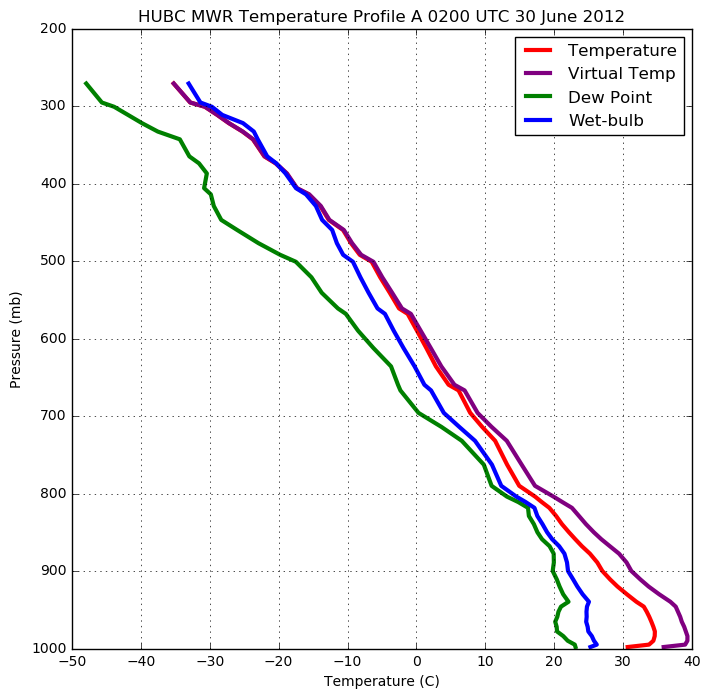

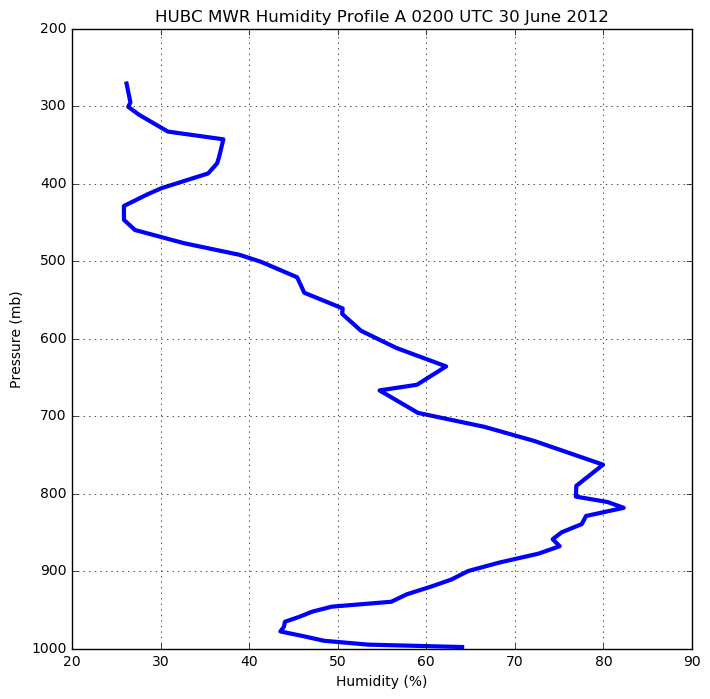

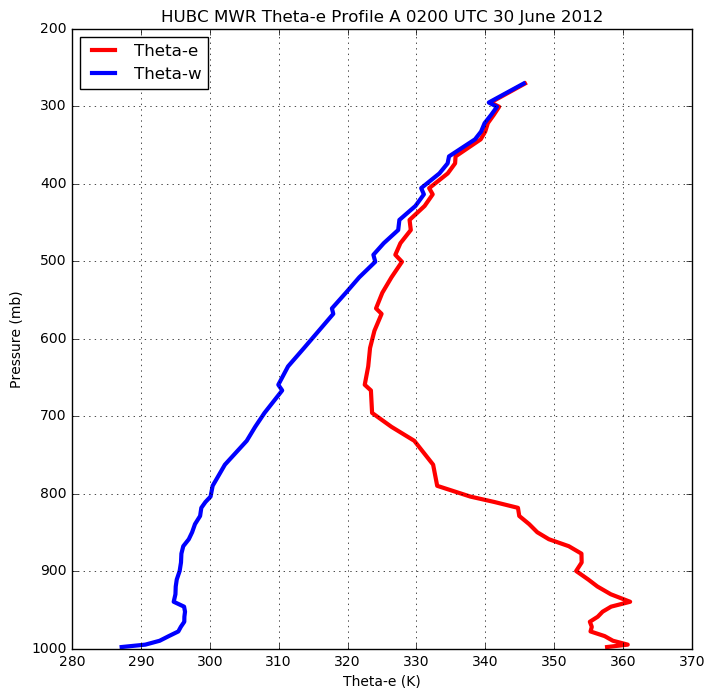

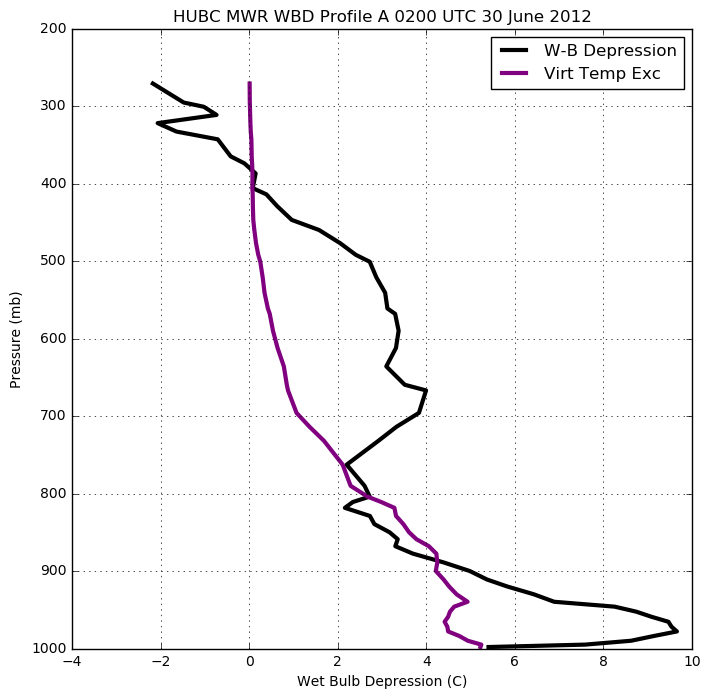

In [13]:
fig = plt.figure(figsize=(8,8))
plt.plot(temperature_c,pressure_pa,color='red',linewidth=3,label='Temperature')
plt.plot(tempvirt_c,pressure_pa,color='purple',linewidth=3,label='Virtual Temp')
plt.plot(dewpoint_c,pressure_pa,color='green',linewidth=3,label='Dew Point')
plt.plot(wetbulb,pressure_pa,color='blue',linewidth=3,label='Wet-bulb')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Temperature (C)")
plt.title("HUBC MWR Temperature Profile A 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("mwr_temp_press_0200_A.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(RH,pressure_pa,color='blue',linewidth=3)
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Humidity (%)")
plt.title("HUBC MWR Humidity Profile A 0200 UTC 30 June 2012")
plt.grid(True)
plt.savefig("mwr_humidity_press_0200_A.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(thetae,pressure_pa,color='red',linewidth=3,label='Theta-e')
plt.plot(thetaw,pressure_pa,color='blue',linewidth=3,label='Theta-w')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Theta-e (K)")
plt.title("HUBC MWR Theta-e Profile A 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig("mwr_thtae_press_0200_A.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(WBD,pressure_pa,color='black',linewidth=3,label='W-B Depression')
plt.plot(tempvirt_exc,pressure_pa,color='purple',linewidth=3,label='Virt Temp Exc')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Wet Bulb Depression (C)")
plt.title("HUBC MWR WBD Profile A 0200 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("mwr_wbd_press_0200_A.png",dpi=250,bbox_inches='tight')
plt.show()


---- Lifted Parcel Quantities ----
Parcel: MU
Ps  : 939.7hPa
TCs :  31.9C
TDs :  22.1C
-------------
Plcl: 815.3hPa
Tlcl:  19.8C
Plfc: 815.3hPa
P_el: 224.6hPa
CAPE:2696.6J
CIN:    0.0J
(939.70000000000005, 31.927999999999997, 22.072270419902459, 'mu')
('CAPE = ', 2696.635444106641)
Figure saved


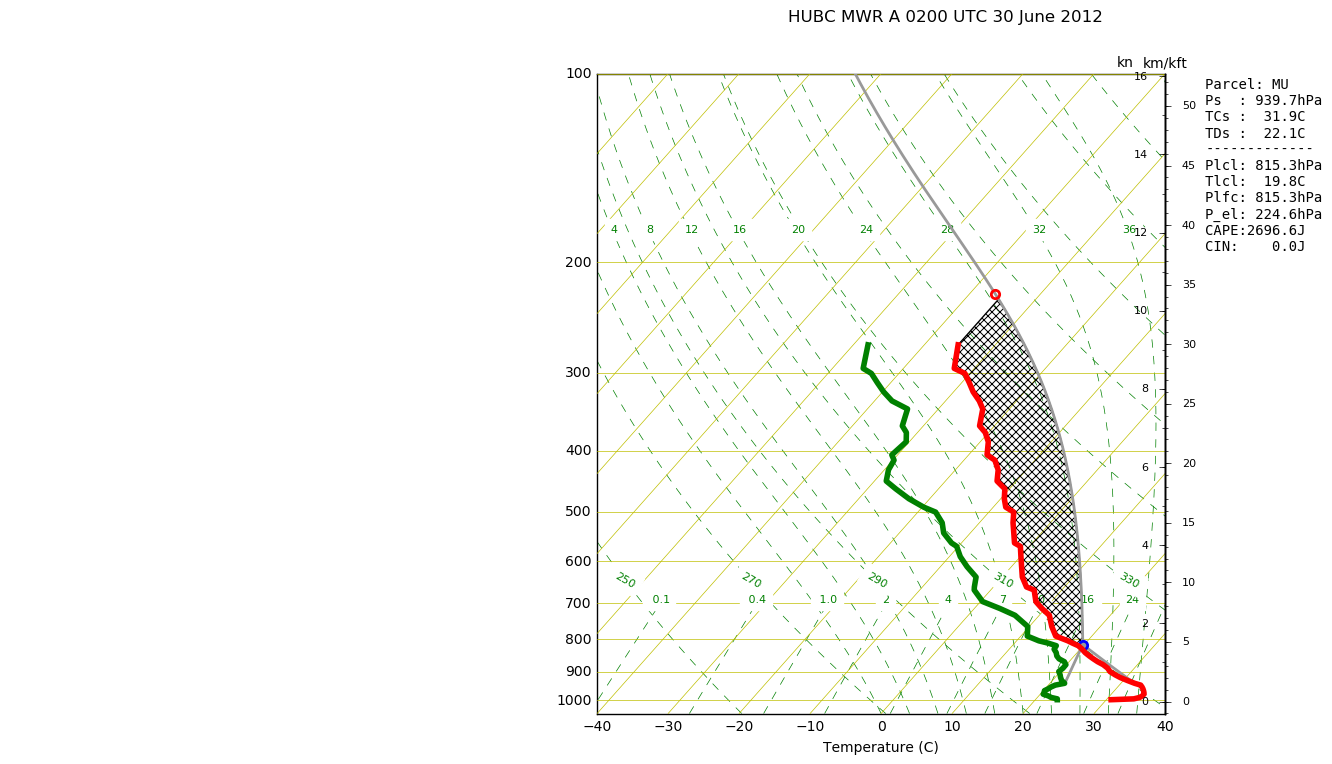

('Z_UP = ', 1.5)
('P_UP = ', 850.0)
('T_UP = ', 295.286)
('TD_UP = ', 290.70769594738061)
('Z_LO = ', 0.1)
('P_LO = ', 995.0)
('T_LO = ', 306.90899999999999)
('TD_LO = ', 296.13241556632954)
('DD_UP = ', 4.5783040526193872)
('DD_LO = ', 10.77658443367045)
('DDD = ', 6.1982803810510632)
('Gamma = ', 8.3021428571428508)
('MWPI_IRv1 = ', 41.466777679260325)
('WGP_IR = ', 47.648823877367221)
('MWPI_IRv2 = ', 5.5967200917454241)
('WGP_IRv2 = ', 52.170464380043768)
('T_UP_mid = ', array([], dtype=float64))
('T_LO_mid = ', array([], dtype=float64))
('TD_LO_mid = ', array([], dtype=float64))
('Tdiff = ', array([], dtype=float64))
('DD_LO = ', array([], dtype=float64))
('ST = ', 3)
('MT = ', 3)
('HI = ', 6)
('Tdiff = ', 11.62299999999999)
('DD_LO = ', 10.77658443367045)
('ST = ', 1)
('MT = ', 1)
('HI = ', 2)
('Tdiff = ', array([], dtype=float64))
('DD_LO = ', array([], dtype=float64))
('ST = ', 3)
('MT = ', 3)
('HI = ', 6)
('Haines Index MID = ', 6)
('Haines Index HIGH = ', 2)
('C-Haines Index 

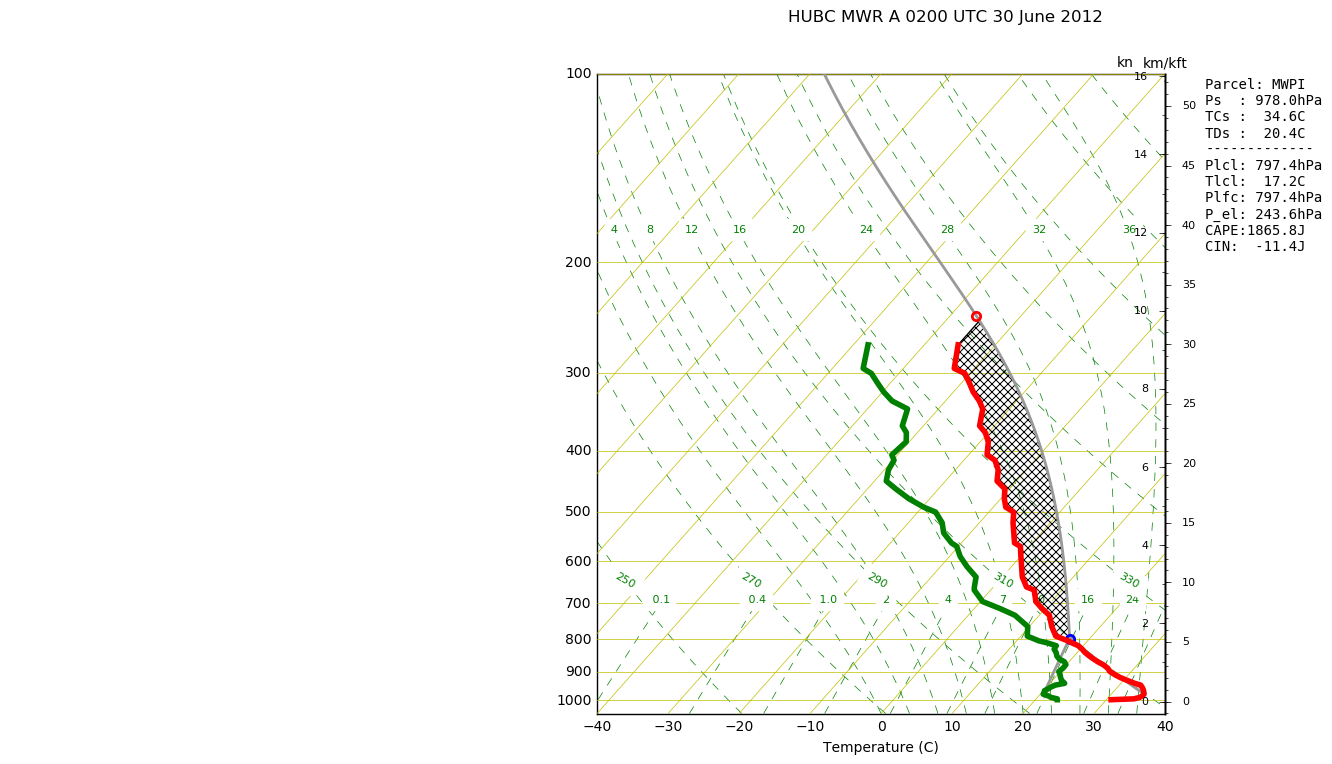

In [14]:
S=SkewT.Sounding(soundingdata=mydata)
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
parcel=S.get_parcel(method='mu')
S.lift_parcel(*parcel)
print(parcel)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('HUBC MWR A 0200 UTC 30 June 2012')
plt.suptitle('HUBC MWR A 0200 UTC 30 June 2012',size=12)
plt.savefig("skewt_hubc_mwr_0630_0200_mu_A.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

#Compute the Microburst Windspeed Potential Index (MWPI)
#CAPE = 1033
Z_UP = 1.5
print("Z_UP = ", Z_UP)
P_UP = pressure[19]
print("P_UP = ", P_UP)
T_UP = temperature[19]
print("T_UP = ", T_UP)
TD_UP = dewpoint[19]
print("TD_UP = ", TD_UP)
Z_LO = 0.1
print("Z_LO = ", Z_LO)
P_LO = pressure[1]
print("P_LO = ", P_LO)
T_LO = temperature[1]
print("T_LO = ", T_LO)
TD_LO = dewpoint[1]
print("TD_LO = ", TD_LO)

def MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE):
    gamma = (T_LO - T_UP)/(Z_UP - Z_LO)
    DD_UP = T_UP - TD_UP
    print("DD_UP = ", DD_UP)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    DDD = DD_LO - DD_UP
    if DDD < 0:
        DDD = 0
    print("DDD = ", DDD)
    MWPI_IRv1 = (CAPE/100) + gamma + DDD
    MWPI_IRv2 = (CAPE/1000) + (gamma/5) + (DDD/5)
    WGP_IR = (0.4553 * MWPI_IRv1) + 28.769
    WGP_IRv2 = (0.35435365777*(MWPI_IRv2**2)) + (1.29598552473*MWPI_IRv2) + 33.8176788073
    return gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2
    
gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2 = MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE)

print("Gamma = ", gamma)
print("MWPI_IRv1 = ", MWPI_IRv1)
print("WGP_IR = ", WGP_IR)
print("MWPI_IRv2 = ", MWPI_IRv2)
print("WGP_IRv2 = ", WGP_IRv2)

def Haines_H(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 17:
        ST = 1
    elif Tdiff >= 17 and Tdiff <= 21:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 14:
        MT = 1
    elif DD_LO >= 14 and DD_LO <= 20:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
 
def Haines_M(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 5:
        ST = 1
    elif Tdiff >= 5 and Tdiff <= 10:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 5:
        MT = 1
    elif DD_LO >= 5 and DD_LO <= 12:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
        
def C_Haines(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if DD_LO >30:
        DD_LO=30
    CA=((T_LO-T_UP)/2)-2
    CB=((DD_LO)/3)-1
    if CB>5:
        CB=5+(CB-5)/2
    CH=CA+CB
    return CH
         
idx_pup_mid = np.where(pressure == 650)
idx_plo_mid = np.where(pressure == 839)
T_UP_mid = temperature_c[idx_pup_mid]
print("T_UP_mid = ", T_UP_mid)
T_LO_mid = temperature_c[idx_plo_mid]
print("T_LO_mid = ", T_LO_mid)
TD_LO_mid = dewpoint[idx_plo_mid]
print("TD_LO_mid = ", TD_LO_mid)
    
HI_M = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
HI_H = Haines_H(T_UP, T_LO, TD_LO)
CH = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
    
print("Haines Index MID = ", HI_M)
print("Haines Index HIGH = ", HI_H)
print("C-Haines Index = ", CH)

temp_p2 = temperature_c[4]
dewpt_p2 = dewpoint_c[4]

fig = plt.figure(figsize=(8, 8))
parcel_2=(978.0, temp_p2, dewpt_p2, 'mwpi')
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
S.lift_parcel(*parcel_2)
print(parcel_2)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('HUBC MWR A 0200 UTC 30 June 2012')
plt.suptitle('HUBC MWR A 0200 UTC 30 June 2012',size=12)
plt.savefig("skewt_mwpi_hubc_mwr_0630_0200_A.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()
